### Overview of Recursion
https://app.dataquest.io/m/228/overview-of-recursion/2/recursion-is-thinking-in-recursion

In [1]:
example_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

def iterative_summation(values):
    total = 0
    for value in values:
        total += value
    return total

iterative_summation(example_list)

55

In [3]:
def recursive_summation(values):
    if len(values) <= 1:
        return values[0]
    return values[0] + recursive_summation(values[1:])

recursive_summation(example_list)

55

In [5]:
search_list = ['apple', 'orange', 'pear', 'fig', 'passionfruit']

def search(strings, term, index=0):
    if strings[0] == term:
        return index
    if len(strings) <= 1:
        return -1
    return search(strings[1:], term, index=index+1)

apple_index = search(search_list, 'apple')
pear_index = search(search_list, 'pear')
foo_index = search(search_list, 'foo')
print(apple_index,pear_index, foo_index)

0 2 -1


In [24]:
# f = open('random_integers.txt', 'r')
# random_integers = [int(line) for line in f.readlines()]

def summation(values):
    if len(values) == 0:
        return 0
    if len(values) == 1:
        return values[0]

    midpoint = len(values) // 2
    return summation(values[:midpoint]) + summation(values[midpoint:])   

import random
random_integers = [random.randint(1, 10) for i in range(10)]
divide_and_conquer_sum = summation(random_integers)
print(divide_and_conquer_sum)

49


In [3]:
# merge two sorted lists to create a new sorted list
def merge(left_list, right_list):
    sorted = []
    while left_list and right_list:
        if left_list[0] < right_list[0]:
            sorted.append(left_list.pop(0))
        else:
            sorted.append(right_list.pop(0))
    sorted += left_list
    sorted += right_list
    return sorted

In [5]:
# merge sort

def merge_sort(unsorted):
    if len(unsorted) < 2:
        return unsorted
    midpoint = len(unsorted) // 2
    left_side = merge_sort(unsorted[:midpoint])
    right_side = merge_sort(unsorted[midpoint:])
    sorted = merge(left_side, right_side)
    return sorted

random_sorted = merge_sort(random_integers)
random_sorted

[1, 1, 1, 2, 3, 4, 5, 7, 8, 9]

In [15]:
# Tower of Hanoi
def printMove(fr, to):
    print('move from ' + str(fr) + ' to ' + str(to))
    
def Tower(n, fr, to, spare):
    if n == 1:
        printMove(fr,to)
    else:
        Tower(n-1, fr, spare, to)
        Tower(1, fr, to, spare)
        Tower(n-1, spare, to, fr)
Tower(2,'f','t','s')        

move from f to s
move from f to t
move from s to t


In [23]:
# palindrome
def isPalindrowm(s):
    def toChars(s):
        s = s.lower()
        ans =''
        for c in s:
            if c in 'abcdefghijklmnopqrstuvwxyz':
                ans = ans+c
        return ans
    
    def isPal(s):
        if len(s) <= 1:
            return True
        else:
            return s[0] == s[-1] and isPal(s[1:-1])
    return isPal(toChars(s))

isPalindrowm('andnyrhjjw')

False

In [16]:
l = [1,2,3,4,5]
l[1:-1]

[2, 3, 4]

### Binary Tree
https://app.dataquest.io/m/229/introduction-to-binary-trees

In [23]:
class Node(object):
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinaryTree(object):
    def __init__(self, root):
        self.root = Node(root)

tree = BinaryTree(1)
tree.root.left = Node(2)
tree.root.right = Node(3)
tree.root.left.left = Node(4)
tree.root.left.right = Node(5)
tree.root.right.left = Node(6)
tree.root.right.right = Node(7)
tree.root.right.right.right = Node(8)
print(tree.root.right.right.right.va)

8


In [22]:
class Queue(object):
    def __init__(self):
        self.items = []
        
    def enqueue(self, item):
        self.items.insert(0, item)
        
    def dequeue(self):
        if not self.is_empty():
            return self.items.pop()
        
    def is_empty(self):
        return len(self.items) == 0
    
    def peek(self):
        if not self.is_empty():
            return self.items[-1].value
        
    def __len__(self):
        return len(self.items)
        
class Node(object):
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinaryTree(object):
    def __init__(self, root):
        self.root = Node(root)
    
    def print_tree(self, traversal_type):
        if traversal_type == 'preorder':
            return self.preorder_print(tree.root, '')
        elif traversal_type == 'inorder':
            return self.inorder_print(tree.root, '')
        elif traversal_type == 'postorder':
            return self.postorder_print(tree.root, '')
        elif traversal_type == 'levelorder':
            return self.levelorder_print(tree.root)
        else:
            print(f'traversal type {traversal_type} is not supported')
            return False
    
    def preorder_print(self, start, traversal):
        """ root -> left -> right"""
        if start: # if node not empty
            traversal += (str(start.value) + '-')
            traversal = self.preorder_print(start.left, traversal)
            traversal = self.preorder_print(start.right, traversal)
        return traversal

    # In-order traversal
    def inorder_print(self, start, traversal):
        """ left -> root -> right"""
        if start: 
            traversal = self.inorder_print(start.left, traversal)
            traversal += (str(start.value) + '-')
            traversal = self.inorder_print(start.right, traversal)
        return traversal
   
    # Post-order traversal
    def postorder_print(self, start, traversal):
        """ left -> right -> root """
        if start: 
            traversal = self.postorder_print(start.left, traversal)
            traversal = self.postorder_print(start.right, traversal)
            traversal += (str(start.value) + '-')
        return traversal
    
    # Level-order traversal
    def levelorder_print(self, start):
        if start is None:
            return
        
        queue = Queue()
        queue.enqueue(start)
        traversal = ''
        while len(queue) > 0:
            traversal += (str(queue.peek()) + '-')
            node = queue.dequeue()
            if node.left:
                queue.enqueue(node.left)
            if node.right:
                queue.enqueue(node.right)
        return traversal
    
tree = BinaryTree(1)
tree.root.left = Node(2)
tree.root.right = Node(3)
tree.root.left.left = Node(4)
tree.root.left.right = Node(5)
tree.root.right.left = Node(6)
tree.root.right.right = Node(7)

#            1
#         /     \
#        2       3
#       / \     / \
#      4   5   6   7

print('preorder:  ', tree.print_tree('preorder'))
print('inorder:   ', tree.print_tree('inorder'))
print('postorder: ', tree.print_tree('postorder'))
print('levelorder:', tree.print_tree('levelorder'))

preorder:   1-2-4-5-3-6-7-
inorder:    4-2-5-1-6-3-7-
postorder:  4-5-2-6-7-3-1-
levelorder: 1-2-3-4-5-6-7-


In [69]:
# Binary search tree: left children less than the parent, wise versa
class Node:
    def __init__(self, data=None):
        self.data = data
        self.left = None
        self.right = None

class BST:
    def __init__(self):
        self.root = None
    
    def insert(self, data):
        if self.root is None:
            self.root = Node(data)
        else:
            self._insert(data, self.root)

    def _insert(self, data, cur_node):
        if data < cur_node.data:
            if cur_node.left is None:
                cur_node.left = Node(data)
            else:
                self._insert(data, cur_node.left)
        elif data > cur_node.data:
            if cur_node.right is None:
                    cur_node.right = Node(data)
            else:
                self._insert(data, cur_node.right)
        else:
            print('the value is already in tree.')
    
    def find(self, data):
        if self.root:
            is_found = self._find(data, self.root)
            if is_found:
                return True
            return False
        else:
            return None
        
    def _find(self, data, cur_node):
        if data > cur_node.data and cur_node.right:
            return self._find(data, cur_node.right)
        elif data < cur_node.data and cur_node.left:
            return self._find(data, cur_node.left)
        if data == cur_node.data:
            return True
        
    # height of binary tree: longest path to leaf
    def height(self, node):
        if node is None:
            return -1
        left_height = self.height(node.left)
        right_height = self.height(node.right)
        return 1+ max(left_height, right_height)

bst = BST()
bst.insert(4)
bst.insert(2)
bst.insert(8)
bst.insert(5)
bst.insert(10)

print(bst.find(7))
print(bst.height(bst.root))   

False
2


In [7]:
class Node:
    def __init__(self, value=None):
        self.value = value
        self.left = None
        self.right = None

class BinaryTree:
    def __init__(self, root=None):
        self.root = root
    
    def insert(self, value):
        if not self.root:
            self.root = Node(value=value)
        elif not self.root.left:
            self.root.left = Node(value=value)
        elif not self.root.right:
            self.root.right = Node(value=value)

tree = BinaryTree(Node(value=1))
tree.insert(2)
tree.insert(3)
tree.insert(4)
root = tree.root.value
left = tree.root.left.value
right = tree.root.right.value
print(root, left, right)

1 2 3


In [5]:
# level order insert
a = [1,2,3]
if a:
    print(a)

[1, 2, 3]


In [6]:
a[2]

3

In [2]:
level_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

class Node:
    def __init__(self, value=None):
        self.value = value
        self.left = None
        self.right = None

    def __repr__(self):
        return "<Node: {}>".format(self.value)

class BinaryTree:
    def __init__(self, values=None):
        self.root = None
        if values:
            self.insert(values)
    
    def insert(self, values, index=0):
        node = None
        if index < len(values):
            node = Node(value=values[index])
            if not self.root:
                self.root = node
            node.left = self.insert(values, index=index*2+1)
            node.right = self.insert(values, index=index*2+2)
            
        return node

tree = BinaryTree(level_order)
root = tree.root.value
child = tree.root.left.right.left.value
print(root, child)

1 10


In [3]:
level_order = [1, 2, 3, 4, 5]
class BaseBinaryTree:
    def __init__(self, values=None):
        self.root = None
        if values:
            self.insert(values)
    
    def insert(self, values, index=0):
        node = None
        if index < len(values):
            node = Node(value=values[index])
            if not self.root:
                self.root = node
            node.left = self.insert(values, index=index*2+1)
            node.right = self.insert(values, index=index*2+2)
        return node
    
class BinaryTree(BaseBinaryTree):
    def is_parent(self, node):
        return bool(node.left or node.right)
    
    def is_interior(self, node):
        return (not node == self.root) and self.is_parent(node)
    
    def is_leaf(self, node):
        return (not node == self.root) and not self.is_interior(node)

tree = BinaryTree(level_order)
root_parent = tree.is_parent(tree.root)
parent = tree.is_parent(tree.root.left)
interior = tree.is_interior(tree.root.left)
root_leaf = tree.is_leaf(tree.root)
leaf = tree.is_leaf(tree.root.left.left)
print(root_leaf, leaf)

False True


In [89]:
class BinaryTree(BaseBinaryTree):
    def preorder_traverse(self, node):
        if not node:
            return []
        return (
            [node.value] +
            self.preorder_traverse(node.left) +
            self.preorder_traverse(node.right)
        )
    
    def inorder_traverse(self, node):
        if not node:
            return []
        return (
            self.inorder_traverse(node.left) +
            [node.value] +
            self.inorder_traverse(node.right)
        )
    
    def postorder_traverse(self, node):
        if not node:
            return []
        return (
            self.postorder_traverse(node.left) +
            self.postorder_traverse(node.right) +
            [node.value]
        )

tree = BinaryTree(level_order)
preorder = tree.preorder_traverse(tree.root)
inorder = tree.inorder_traverse(tree.root)
postorder = tree.postorder_traverse(tree.root)

print('preorder:  ', preorder)
print('inorder:   ', inorder)
print('postorder: ', postorder)

preorder:   [1, 2, 4, 5, 3]
inorder:    [4, 2, 5, 1, 3]
postorder:  [4, 5, 2, 3, 1]


In [94]:
class BinaryTree(BaseBinaryTree):
    def preorder_traverse(self, node):
        if not node:
            return []
        return (
            [node.value] +
            self.preorder_traverse(node.left) +
            self.preorder_traverse(node.right)
        )
    def depth(self, node):
        if not node:
            return 0
        return max(self.depth(node.left), self.depth(node.right)) + 1
    
    def num_nodes(self, node):
        return len(self.preorder_traverse(node))
    
    def is_balanced(self, node):
        if not node:
            return True
        left_height = self.depth(node.left)
        right_height = self.depth(node.right)
        if abs(left_height-right_height) <= 1:
            return True
        else:
            return False
    
tree = BinaryTree(level_order)
depth = tree.depth(tree.root)
num_nodes = tree.num_nodes(tree.root)
print(depth, num_nodes)
balanced = tree.is_balanced(tree.root)
print(balanced)

3 5
True


### Implementing a Binary Heap
https://app.dataquest.io/m/230/implementing-a-binary-heap

In [98]:
# Min Heap: each parent node is less than or equal to its child node. 
# Max heap: each parent node is greater than or equal to its child node.
# inserting a node into a Max heap: add child, compare parent and current node, swap if necessary

class Node:
    def __init__(self, value=None):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

    def __repr__(self):
        # Helpful method to keep track of Node values.
        return "<Node: {}>".format(self.value)    

class MaxHeap:
    def __init__(self):
        self.root = None
    
    def insert(self, value):
        node = Node(value=value)
        if not self.root:
            self.root = node
            return node
        
        if self.root.value >= node.value: # if current root >= new node, 
            node.parent = self.root # make root node a parent
            if not self.root.left:
                self.root.left = node 
            elif not self.root.right:
                self.root.right = node
            return node
        
        old_root = self.root 
        node.left = old_root.left
        node.right = old_root.right
        self.root = node
        
        if not self.root.left:
            self.root.left = old_root
        elif not self.root.right:
            self.root.right = old_root
        return node
                
heap = MaxHeap()
heap.insert(3)
heap.insert(9)
heap.insert(11)
root = heap.root.value
left = heap.root.left.value
right = heap.root.right.value 
print(root, left, right)

11 3 9


In [107]:
# use list as the internal data structure for a max-heap.
import math
class BaseMaxHeap():
    def __init__(self):
        self.nodes = []
    
    def insert(self, value):
        self.nodes.append(value)
        index = len(self.nodes) - 1
        parent_index = math.floor((index-1)/2)
        
        while index > 0 and self.nodes[parent_index] < self.nodes[index]:
            self.nodes[parent_index], self.nodes[index] = self.nodes[index], self.nodes[parent_index]
            index = parent_index
            parent_index = math.floor((index-1)/2)
        return self.nodes
    
heap = MaxHeap()
heap.insert(3)
heap.insert(9)
heap.insert(11)
nodes = heap.nodes
print(nodes)

[11, 3, 9]


In [122]:
class MaxHeap(BaseMaxHeap):
    def insert_multiple(self, values):
        for value in values:
            self.insert(value)

    def max(self):
        return self.nodes[0]

    def pop(self): # remove the root element from the max-heap
        root = self.nodes[0]
        self.nodes[0] = self.nodes[-1]
        self.nodes = self.nodes[:-1]
        index = 0
        left_child_idx = 2*index + 1
        right_child_idx = 2*index + 2
        
        while max(left_child_idx, right_child_idx) < len(self.nodes) - 1:
            swap_index = left_child_idx
            if self.nodes[left_child_idx] < self.nodes[right_child_idx]:
                swap_index = right_child_idx
            if self.nodes[swap_index] < self.nodes[index]:
                return root
            
            self.nodes[swap_index], self.nodes[index] = self.nodes[index], self.nodes[swap_index]
            index = swap_index
            left_child_idx = 2*index + 1
            right_child_idx = 2*index + 2
        return root

    def top_n_elements(self, n):
        return [self.pop() for _ in range(n)]
            
heap_list = [3,9,5,11,4,6]
heap = MaxHeap()
heap.insert_multiple(heap_list)
heap_max = heap.max()
print('heap max after insertion: ', heap_max)
heap_max = heap.pop()
print('first pop: ', heap_max)
heap_max = heap.pop()
print('2nd pop: ', heap_max)
top_3 = heap.top_n_elements(3)
print(f'top_3 is {top_3}')

heap max after insertion:  11
first pop:  11
2nd pop:  9
top_3 is [6, 3, 4]


In [129]:
# using heapq
import csv
import heapq
with open('Raw_data/amounts.csv', 'r') as f:
    reader = csv.reader(f)
    heap_list = list(reader)[1:]
    
# find the top 100 rows with the second column as the key    
top_100 = heapq.nlargest(100, heap_list, key=lambda x: x[1])
print(top_100[:3])

[['141100', '999.9'], ['32406', '999.88'], ['82298', '999.52']]


In [131]:
import time
import random
heap_list = list(range(10 * 100 * 5000))
random.shuffle(heap_list)
    
start = time.time()
sorted(heap_list, reverse=True)[:100]
print("Sorting search took: {} seconds".format(time.time() - start))

start = time.time()
heapq.nlargest(100, heap_list)
print("Heap search took: {} seconds".format(time.time() - start))

Sorting search took: 5.08812952041626 seconds
Heap search took: 1.0156407356262207 seconds


### Working with Binary Search Trees
https://app.dataquest.io/m/231/working-with-binary-search-trees

In [33]:
"""
BST = Every value in a nodes' left sub-tree has a value that is less than or equal to the parent node
      Every value in a nodes' right sub-tree has a value that is greater than or equal to the parent node
"""
class Node:
    def __init__(self, value=None):
        self.left = None
        self.right = None
        self.value = value
    
    def __str__(self):
        return "<Node: {}>".format(self.value)

class BaseBST:
    def __init__(self):
        self.node = None
    
    def insert(self, value=None):
        node = Node(value=value)
        if not self.node:
            self.node = node
            self.node.right = BaseBST()
            self.node.left = BaseBST()
            return
        
        if value > self.node.value:
            if self.node.right:
                self.node.right.insert(value=value)
            else:
                self.node.right.node = node
            return
        
        if self.node.left:
            self.node.left.insert(value=value)
        else:
            self.node.left.node = node
    
    def inorder(self, tree):
        if not tree or not tree.node:
            return []
        return (
            self.inorder(tree.node.left) +
            [tree.node.value] +
            self.inorder(tree.node.right)
        )

    def search(self, value):
        if not self.node:
            return False
        if value == self.node.value:
            return True
        result = False
        if self.node.left:
            result = self.node.left.search(value)
        if self.node.right:
            result = self.node.right.search(value)
        return result
    
bst = BaseBST()
bst.insert(4)
bst.insert(2)
bst.insert(1)
bst.insert(5)
bst.insert(3)
root = bst.node.value
print(root)

4


In [38]:
class BST(BaseBST):
    def insert_multiple(self, values):
        for value in values:
            self.insert(value)
    
    def depth(self, node):
        if not node:
            return 0
        if not node.left and not node.right:
            return 1
        return max(self.depth(node.left.node), self.depth(node.right.node)) + 1
    
    def is_balanced(self):
        if not self.node:
            return True
        left_subtree = self.depth(self.node.left.node)
        right_subtree = self.depth(self.node.right.node)
        return abs(left_subtree - right_subtree) < 2

    def left_rotate(self):
        old_node = self.node                # save old self.node
        new_node = self.node.right.node     # set new root note as old.node.right.node
        if not new_node:                    # stop is new node is not a node
            return
        new_right_sub = new_node.left.node  # prepare to move new_node.left.node to the left of new node
        self.node = new_node                # replace root node with new_node
        old_node.right.node = new_right_sub # move new_node.left.node as right node for the old root note
        new_node.left.node = old_node
    
    def right_rotate(self):
        old_node = self.node
        new_node = self.node.left.node
        if not new_node:
            return
        
        new_left_sub = new_node.right.node
        self.node = new_node
        old_node.left.node = new_left_sub
        new_node.right.node = old_node

bst_values = range(20)
bst = BST()
bst.insert_multiple(bst_values)
sorted_inorder = bst.inorder(bst)
print(sorted_inorder)
does_exist_1 = bst.search(1)
print('does_exist_1?', does_exist_1)
does_exist_27 = bst.search(27)
print('does_exist_27?', does_exist_27)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
does_exist_1? True
does_exist_27? False


In [39]:
# check for tree-balance BST
bst_values = [3,2,5,4,7]
bst = BST()
bst.insert_multiple(bst_values)
balanced = bst.is_balanced()
print(balanced)

True


In [40]:
# self-balancing tree using rotations
bst = BST()
bst.insert_multiple(bst_values)
bst.left_rotate()
left_balanced = bst.is_balanced()
bst.right_rotate()
right_balanced = bst.is_balanced()
print(left_balanced, right_balanced)

True True


In [41]:
# AVL (Adelson-Velsky and Landis) Tree: self_balancing
class BST(BaseBST):
    def insert(self, value=None):
        node = Node(value=value)
        if not self.node:
            self.node = node
            self.node.left = BST()
            self.node.right = BST()
            return
        
        if value > self.node.value:
            if self.node.right:
                self.node.right.insert(value=value)
            else:
                self.node.right.node = node
        else:
            if self.node.left:
                self.node.left.insert(value=value)
            else:
                self.node.left.node = node
        
        difference = self.depth(self.node.left.node) - self.depth(self.node.right.node)
        
        # Left side case.
        if difference > 1:
            # Left-right case.
            if value > self.node.right.node.value:
                self.node.left.left_rotate()
            # Left-left case.
            self.right_rotate()
            
        # Right side case.
        if difference < -1:
            # Right-left case.
            if value <= self.node.left.node.value:
                self.node.left.right_rotate()
            self.left_rotate()
    
    def insert_multiple(self, values):
        for value in values:
            self.insert(value)
            
    def depth(self, node):
        if not node:
            return 0
        if not node.left and not node.right:
            return 1
        
        return max(self.depth(node.left.node), self.depth(node.right.node)) + 1
    
    def is_balanced(self):
        if not self.node:
            return True
        
        left_subtree = self.depth(self.node.left.node)
        right_subtree = self.depth(self.node.right.node)
        
        return abs(left_subtree - right_subtree) < 2

bst = BST()
bst.insert_multiple(bst_values)
inorder = bst.inorder(bst)
is_bst_balanced = bst.is_balanced()
print(is_bst_balanced)

True


In [52]:
class Node:
    def __init__(self, key=None, value=None):
        self.left = None
        self.right = None
        self.key = key
        self.value = value

    def __str__(self):
        return "<Node: {}>".format(self.value)
    
class BST(BaseBST):
    def __init__(self, index=None):
        self.node = None
        self.index = index
    
    def insert_multiple(self, values):
        for value in values:
            self.insert(value)
    
    def depth(self, node):
        if not node:
            return 0
        if not node.left and not node.right:
            return 1
        
        return max(self.depth(node.left.node), self.depth(node.right.node)) + 1
    
    def insert(self, value=None):  # value = list
        key = value
        if self.index:
            key = value[self.index]
        node = Node(key=key, value=value)
        
        if not self.node:
            self.node = node
            self.node.left = BST(index=self.index)
            self.node.right = BST(index=self.index)
            return
        
        if key > self.node.key:
            if self.node.right:
                self.node.right.insert(value=value)
            else:
                self.node.right.node = node
        else:
            if self.node.left:
                self.node.left.insert(value=value)
            else:
                self.node.left.node = node
        
        difference = self.depth(self.node.left.node) - self.depth(self.node.right.node)
        
        # Left side case.
        if difference > 1:
            # Left-right case.
            if key > self.node.right.node.key:
                self.node.left.left_rotate()
            # Left-left case.
            self.right_rotate()
            
        # Right side case.
        if difference < -1:
            # Right-left case.
            if key <= self.node.left.node.key:
                self.node.left.right_rotate()
            self.left_rotate()
    
    def search(self, key):
        if not self.node:
            return False
        if key == self.node.key:
            return True
        
        result = False
        if self.node.left:
            result = self.node.left.search(key)
        if self.node.right:
            result = self.node.right.search(key)
        return result
    
    def left_rotate(self):
        old_node = self.node
        new_node = self.node.right.node
        if not new_node:
            return
        
        new_right_sub = new_node.left.node
        self.node = new_node
        old_node.right.node = new_right_sub
        new_node.left.node = old_node
    
    def right_rotate(self):
        old_node = self.node
        new_node = self.node.left.node
        if not new_node:
            return
     
bst_values = [3,2,5,4,7]
bst = BST()
bst.insert_multiple(bst_values)
inorder = bst.inorder(bst)
bst_list = BST(index=2)
bst_list_values = [['hello', 'world', 3],['goodbye', 'world', 2],['foo', 'bar', 5],['fizz', 'buzz', 4],['lorem', 'ipsum', 7],['this', 'that', 6],
['enough', 'programming', 8]]
bst_list.insert_multiple(bst_list_values)
inorder_list = bst.inorder(bst_list)
print(inorder_list)

[['goodbye', 'world', 2], ['hello', 'world', 3], ['fizz', 'buzz', 4], ['foo', 'bar', 5], ['this', 'that', 6], ['lorem', 'ipsum', 7], ['enough', 'programming', 8]]


In [43]:
print(help(bst.insert))
print(isinstance(bst, BST))
print(issubclass(BST,BaseBST))

Help on method insert in module __main__:

insert(value=None) method of __main__.BST instance

None
True
True


### B-trees and B+ trees

In [44]:
# Block (512 bytes) on disk is defined by Track# and Sector#
# every byte in a block is defined by offset, starting from zero

<div>
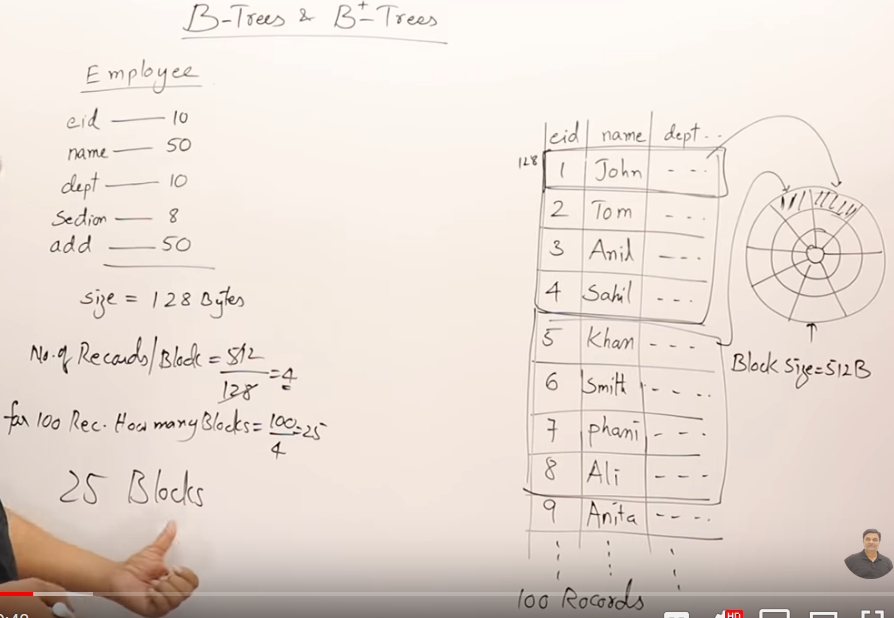
</div>

<div>
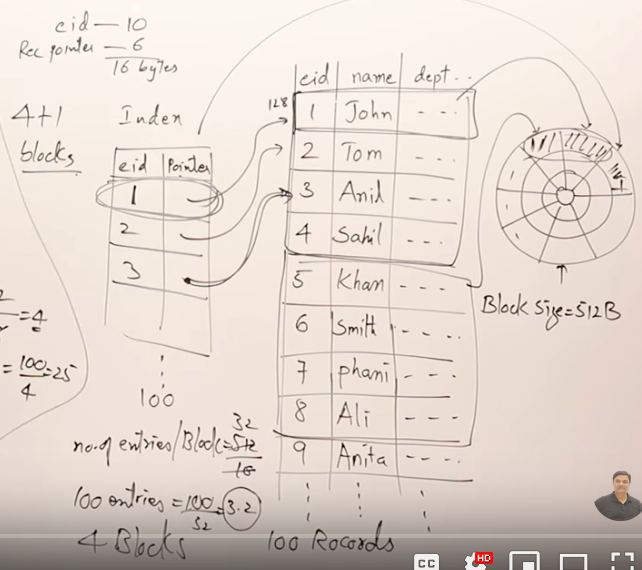
</div>

multi-level indexing
<div>
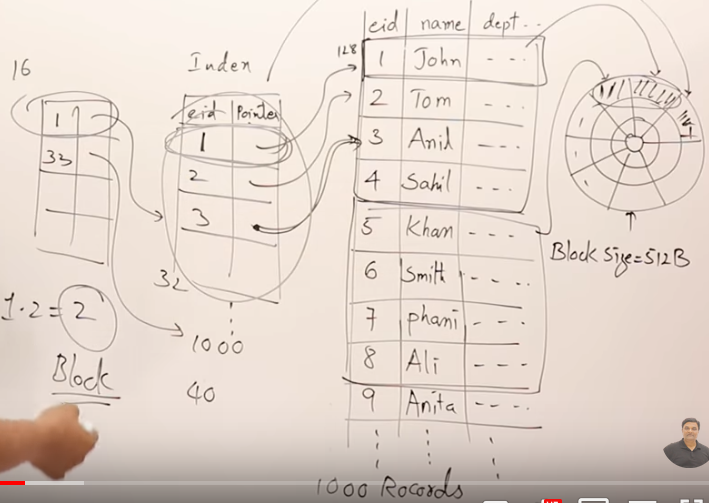  
<div/>

self_managed multi-level indexing: B-trees and B+trees
m-way search tree: each node can have no more than m children, and m-1 keys. binary tree is 2-way tree with 1 key
<div>
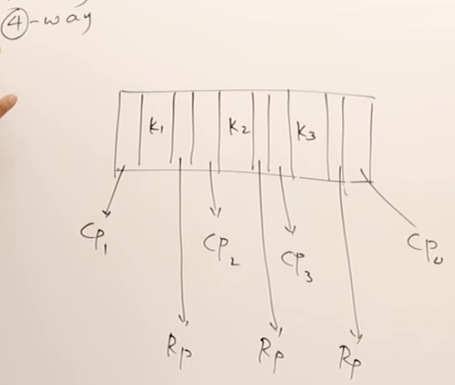
<div/>

In [107]:
# store and search list of lists
class Node:
    def __init__(self, key=None, value=None):
        self.left = None
        self.right = None
        self.key = key
        self.value = value

    def __str__(self):
        return "<Node: {}>".format(self.value)
    
class BST(BaseBST):
    def __init__(self, index=None):
        self.node = None
        self.index = index
    
    def insert_multiple(self, values):
        for value in values:
            print('from insert_multiple:', value)
            self.insert(value)
    
    def depth(self, node):
        if not node:
            return 0
        if not node.left and not node.right:
            return 1
        
        return max(self.depth(node.left.node), self.depth(node.right.node)) + 1
    
    def insert(self, value=None):  # value = list
        key = value
        if self.index:
            key = value[self.index]
        node = Node(key=key, value=value)
        
        if not self.node:
            self.node = node
            self.node.left = BST(index=self.index)
            self.node.right = BST(index=self.index)
            return
        
        if key > self.node.key:
            if self.node.right:
                self.node.right.insert(value=value)
            else:
                self.node.right.node = node
        else:
            if self.node.left:
                self.node.left.insert(value=value)
            else:
                self.node.left.node = node
        
        difference = self.depth(self.node.left.node) - self.depth(self.node.right.node)
        
        # Left side case.
        if difference > 1:
            # Left-right case.
            if key > self.node.right.node.key:
                self.node.left.left_rotate()
            # Left-left case.
            self.right_rotate()
            
        # Right side case.
        if difference < -1:
            # Right-left case.
            if key <= self.node.left.node.key:
                self.node.left.right_rotate()
            self.left_rotate()
    
    def search(self, key):
        if not self.node:
            return False
        if key == self.node.key:
            return True
        
        result = False
        if self.node.left:
            result = self.node.left.search(key)
        if self.node.right:
            result = self.node.right.search(key)
        return result
    
    def left_rotate(self):
        old_node = self.node
        new_node = self.node.right.node
        if not new_node:
            return
        
        new_right_sub = new_node.left.node
        self.node = new_node
        old_node.right.node = new_right_sub
        new_node.left.node = old_node
    
    def right_rotate(self):
        old_node = self.node
        new_node = self.node.left.node
        if not new_node:
            return
     
    def greater_than(self, key):
        """returns a list of the values greater than the given key"""
        if not self.node:
            return []
        
        values = []
        if self.node.left:
            values += self.node.left.greater_than(key)
        if self.node.right:
            values += self.node.right.greater_than(key)
        if self.node.key > key:
            values.append(self.node.value)
        return values

bst = BST()
bst.insert_multiple(bst_values)
greater = bst.greater_than(5)

bst_list = BST(index=2)
bst_list.insert_multiple(bst_list_values)
greater_list = bst_list.greater_than(5)
print()
print(greater_list)

from insert_multiple: 3
from insert_multiple: 2
from insert_multiple: 5
from insert_multiple: 4
from insert_multiple: 7
from insert_multiple: ['hello', 'world', 3]
from insert_multiple: ['goodbye', 'world', 2]
from insert_multiple: ['foo', 'bar', 5]
from insert_multiple: ['fizz', 'buzz', 4]
from insert_multiple: ['lorem', 'ipsum', 7]
from insert_multiple: ['this', 'that', 6]
from insert_multiple: ['enough', 'programming', 8]

[['this', 'that', 6], ['enough', 'programming', 8], ['lorem', 'ipsum', 7]]


In [56]:
[1,2,3]+[4,5]

[1, 2, 3, 4, 5]

In [78]:
with open('Raw_data\\amounts.csv', 'r') as f:
    data = f.readlines()
print(data[0:10])

['"Time","Amount"\n', '0,149.62\n', '0,2.69\n', '1,378.66\n', '1,123.5\n', '2,69.99\n', '2,3.67\n', '4,4.99\n', '7,40.8\n', '7,93.2\n']


In [2]:
import csv
with open('Raw_data\\amounts.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    amount_rows = list((int(float(r[0])), float(r[1])) for r in reader)
print(amount_rows[0:15])

[(0, 149.62), (0, 2.69), (1, 378.66), (1, 123.5), (2, 69.99), (2, 3.67), (4, 4.99), (7, 40.8), (7, 93.2), (9, 3.68), (10, 7.8), (10, 9.99), (10, 121.5), (11, 27.5), (12, 58.8)]


In [3]:
print(len(amount_rows))

284807


## @Francois's code

In [1]:
class Node:
    def __init__(self, key=None, value=None):
        self.left = None
        self.right = None
        self.value = value
        self.key = key
    
    def __str__(self):
        return "<Node: {}>".format(self.value)

class BST:
    def __init__(self, index=None):
        self.node = None
        self.index = index
    
    def insert_multiple(self, values):
        for value in values:
            self.insert(value)
    
    def insert(self, value=None):
        key = value
        if self.index:
            key = value[self.index]
        node = Node(key=key, value=value)
        
        if not self.node:
            self.node = node
            self.node.left = BST(index=self.index)
            self.node.right = BST(index=self.index)
            return
        
        if key > self.node.key:
            if self.node.right:
                self.node.right.insert(value=value)
            else:
                self.node.right.node = node
        else:
            if self.node.left:
                self.node.left.insert(value=value)
            else:
                self.node.left.node = node
        
        difference = self.depth(self.node.left.node) - self.depth(self.node.right.node)
        
        if difference > 1:
            if self.node.right.node and key > self.node.right.node.key:
                self.node.left.left_rotate()
            self.right_rotate()
            
        if difference < -1:
            if self.node.left.node and key <= self.node.left.node.key:
                self.node.left.right_rotate()
            self.left_rotate()
    
    def inorder(self, tree):
        if not tree or not tree.node:
            return []
        return (
            self.inorder(tree.node.left) +
            [tree.node.value] +
            self.inorder(tree.node.right)
        )
    
    def search(self, key):
        if not self.node:
            return False
        if key == self.node.key:
            return True
        
        result = False
        if self.node.left:
            result = self.node.left.search(key)
        if self.node.right:
            result = self.node.right.search(key)
        return result

    def depth(self, node):
        if not node:
            return 0
        if not node.left and not node.right:
            return 1
        
        return max(self.depth(node.left.node), self.depth(node.right.node)) + 1
    
    def left_rotate(self):
        old_node = self.node
        new_node = self.node.right.node
        if not new_node:
            return
        
        new_right_sub = new_node.left.node
        self.node = new_node
        old_node.right.node = new_right_sub
        new_node.left.node = old_node
    
    def right_rotate(self):
        old_node = self.node
        new_node = self.node.left.node
        if not new_node:
            return
        
        new_left_sub = new_node.right.node
        self.node = new_node
        old_node.left.node = new_left_sub
        new_node.right.node = old_node

    def is_balanced(self):
        if not self.node:
            return True
        
        left_subtree = self.depth(self.node.left.node)
        right_subtree = self.depth(self.node.right.node)
        
        return abs(left_subtree - right_subtree) < 2
    
    def greater_than(self, key):
        """takes in a key and returns a list of the values greater than the given key"""
        if not self.node:
            return []
        values = []
        if self.node.left:
            values += self.node.left.greater_than(key)
        if self.node.right:
            values += self.node.right.greater_than(key)
        if self.node.key > key:
            values.append(self.node.value)
        return values

import time
start = time.time()
import csv
with open('amounts.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    # query on the second column, the amounts field to find rows
    amount_rows = list((int(float(r[0])), float(r[1])) for r in reader)
    # amount_rows = amount_rows[0:1000]

durations_insert=[]
durations_search=[]

bst = BST(index=1)
for i in range(1000, 5000, 500):
    data = amount_rows[0:i]
    bst.insert_multiple(data)
    ins_time = time.time()
    durations_insert.append(ins_time - start)
# print(f'time to complete insert = {time.time() - start}'.format(time.time() - start), 2)
    csv_query = bst.greater_than(10)
    durations_search.append(time.time() - ins_time)
    print(csv_query[0:5])

[(553, 10.08), (373, 10.29), (206, 10.27), (449, 10.2), (735, 10.38)]
[(553, 10.08), (449, 10.2), (553, 10.08), (206, 10.27), (373, 10.29)]
[(553, 10.08), (553, 10.08), (1323, 10.09), (449, 10.2), (449, 10.2)]
[(553, 10.08), (553, 10.08), (553, 10.08), (1323, 10.09), (1872, 10.12)]
[(553, 10.08), (553, 10.08), (553, 10.08), (553, 10.08), (1323, 10.09)]
[(2736, 10.02), (553, 10.08), (553, 10.08), (553, 10.08), (553, 10.08)]
[(2736, 10.02), (553, 10.08), (553, 10.08), (553, 10.08), (2736, 10.02)]
[(2736, 10.02), (2736, 10.02), (553, 10.08), (553, 10.08), (553, 10.08)]


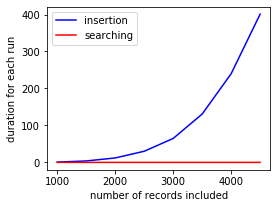

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(4,3))
plt.plot(range(1000, 5000, 500), durations_insert, color='blue')
plt.plot(range(1000, 5000, 500), durations_search, color='red')
plt.xlabel('number of records included')
plt.ylabel('duration for each run')
plt.legend(['insertion', 'searching'])

### Performance Boosts of Using a B-Tree
https://app.dataquest.io/m/232/performance-boosts-of-using-a-b-tree

Constraints for a B-tree of order m:
    1. the root has >= 2 children
    2. every node has <= m children, 
    3. every non-leaf, non-root node has >= m/2 children
    4. a non-leaf node with k children has k-1 keys
    5. all leaves appear at the same level
To insert a key, first loop through root to find the right leaf note, then loop through the leaf note to find the right position.
If the leaf is full, after finding the right child node, split the node to two, insert theh new key, then promote the median key up one level.

In [28]:
import csv
import linecache
import timeit

def find_row():
    return list(csv.reader(linecache.getline('Raw_data\\amounts.csv', 282748)))
print(find_row())
print(timeit.timeit('find_row()', 'from __main__ import find_row', number=100))

[['1'], ['7'], ['1'], ['1'], ['1'], ['6'], ['', ''], ['9'], ['.'], ['8'], ['5'], []]
0.0005023999999593798


In [43]:
def brute_search():
    with open('Raw_data\\amounts.csv') as f:
        reader = csv.reader(f)
        rows = []
        for row in reader:
            if reader.line_num in [4, 41231, 284400]:
                rows.append(row)
        return rows

def cache_search():
    """linecache module exposes a function getline() which takes in a file, a line number, 
       then retrieves that line from the file"""
    return list(csv.reader(linecache.getline('Raw_data\\amounts.csv', i) for i in [4, 41231, 284400]))

print(timeit.timeit('brute_search()', 'from __main__ import brute_search', number=50))
print(timeit.timeit('cache_search()', 'from __main__ import cache_search', number=50))
print(brute_search())
print(cache_search())

13.787184600001638
0.06272309999985737
[['1', '378.66'], ['40596', '23.88'], ['172406', '41.97']]
[['1', '378.66'], ['40596', '23.88'], ['172406', '41.97']]


In [2]:
class Node:
    """An index is a data structure that contains a key and a direct reference to a row of data.
       The index could stores a key like a timestamp and a value like file's line number """
    def __init__(self, keys=None, children=None):
        # nodes of the tree contains number of keys and reference
        self.keys = keys or []
        self.children = children or []
    
    def is_leaf(self):
        return len(self.children) == 0

    def __repr__(self):
        return "<Node: {}>".format(self.keys)    

class BTree: # a balanced tree having multiple keys and children in sorted order.
    def __init__(self, t): # t= the degree of the tree.  min keys/node = t-1, max keys = 2t-1, min childres = t
        self.t = t
        self.root = None

b_node = Node(keys=[1, 4, 8])
node_is_leaf = b_node.is_leaf()
print(node_is_leaf)
btree = BTree(3)
btree.root = b_node
keys = btree.root.keys
print(keys)

True
[1, 4, 8]


In [3]:
keys = [1, 2, 3, 5]
keys.insert(3, 4)
print(keys)

[1, 2, 3, 4, 5]


In [3]:
class Node:
    """An index is a data structure that contains a key and a direct reference to a row of data.
       The index could stores a key like a timestamp and a value like file's line number """
    
    def __init__(self, keys=None, children=None):
        # nodes of the tree contains number of keys and reference
        self.keys = keys or []
        self.children = children or []
    
    def is_leaf(self):
        return len(self.children) == 0

    def __repr__(self):
        return "<Node: {}>".format(self.keys)    

class BTree:
    def __init__(self, t): # init tree with degree and root
        self.t = t
        self.root = None

    def insert_multiple(self, keys):
        for key in keys:
            self.insert(key)
        
    def insert(self, key):
        if not self.root:
            self.root = Node(keys=[key])
            return
        
        if len(self.root.keys) == 2*self.t - 1:
            old_root = self.root
            self.root = Node()
            left, right, new_key = self.split(old_root)
            self.root.keys.append(new_key)
            self.root.children.append(left)
            self.root.children.append(right)
            
        self.insert_non_full(self.root, key)  
        
    def insert_non_full(self, node, key):  # add a new key in sorted order into a leaf node
        if node.is_leaf(): # if node has no children
            index = 0
            for k in node.keys:
                if key > k: index += 1  # if new key > older keys, keep moving
                else: break # if leaf node is full, break
            node.keys.insert(index, key)  # inserting new key at new index
            return
        
        index = 0  # if node has children, also loop through keys to find new index for the new key
        for k in node.keys:
            if key > k: index += 1 # find right index for a child
            else: break
                
        if len(node.children[index].keys) == 2*self.t - 1:  # if child is full, spliting it next
            left_node, right_node, new_key = self.split(node.children[index])
            node.keys.insert(index, new_key)
            node.children[index] = left_node
            node.children.insert(index+1, right_node)
            if key > new_key:
                index += 1
        self.insert_non_full(node.children[index], key)
    
    def split(self, node):
        left_node = Node(
            keys=node.keys[:len(node.keys)//2],
            children=node.children[:len(node.children)//2+1]
        )
        right_node = Node(
            keys=node.keys[len(node.keys)//2:],
            children=node.children[len(node.children)//2:]
        )
        key = right_node.keys.pop(0)
        return left_node, right_node, key
     
    def search(self, node, term):
        if not self.root:
            return False
        index = 0
        for key in node.keys:
            if key == term:
                return True
            if term > key:
                index += 1
        if node.is_leaf():
            return False
        
        return self.search(node.children[index], term)
       
# We have initialized a sample BTree for you.
btree = BTree(4)
b_node = Node(keys=[8, 18])
b_node.children.append(Node(keys=[-3, -2, -1, 2, 3, 5, 7]))
b_node.children.append(Node(keys=[9, 10, 11, 12, 14, 18, ]))
b_node.children.append(Node(keys=[17, 20, 44]))
btree.root = b_node
btree.insert(1)
btree.insert(4)
btree.insert(6)
btree.insert(13)
btree.insert(17)
btree.insert(22)
child_keys = btree.root.children[1].keys
print(child_keys)

[3, 4, 5, 6, 7]


In [4]:
btree = BTree(5)
btree.insert_multiple(range(0, 100))
child_keys = btree.root.children[-1].children[0].keys
print(child_keys)

[50, 51, 52, 53]


In [5]:
btree = BTree(4)
btree.insert_multiple(range(0,100))
search_6 = btree.search(btree.root, 6)
search_73 = btree.search(btree.root, 73)
search_101 = btree.search(btree.root, 101)
print(search_6, search_73, search_101)

True True False


In [6]:
import csv
with open('Raw_data\\amounts.csv', 'r') as f:
    reader = csv.reader(f)
    values = [float(l[0]) for l in list(reader)[1:]] # get values from the time column
      
btree = BTree(5)
btree.insert_multiple(values)
search = btree.search(btree.root,17106)
root = btree.root.keys
print(root)

[57618.0, 109829.0]


In [7]:
with open('Raw_data\\amounts.csv', 'r') as f:
    reader = csv.reader(f)
    print(list(reader)[0])

['Time', 'Amount']


In [8]:
class NodeKey:
    def __init__(self, key, value):
        self.key = key
        self.value =value
    
    def __eq__(self, other):
        if isinstance(other, self.__class__):
            return self.key == other.key
        return self.key == other

    def __gt__(self, other):
        if isinstance(other, self.__class__):
            return self.key > other.key
        return self.key > other
    
    def __lt__(self, other):
        if isinstance(other, self.__class__):
            return self.key < other.key
        return self.key < other
    
    def __ge__(self, other):
        if isinstance(other, self.__class__):
            return self.key >= other.key
        return self.key > other
    
    def __le__(self, other):
        if isinstance(other, self.__class__):
            return self.key <= other.key
        return self.key < other
    
    def __repr__(self):
        return "<Node: {}:{}>".format(self.key, self.value)
    
with open('Raw_data\\amounts.csv', 'r') as f:
    reader = csv.reader(f)
    nodekeys = [NodeKey(float(row[0]),float(row[0])) for row in list(reader)[1:]]

btree = BTree(5)
btree.insert_multiple(nodekeys)
search = btree.search(btree.root, 171116)
root_key = btree.root.keys[0].key
print(root_key)

57618.0


In [9]:
print(nodekeys[0:5])

[<Node: 0.0:0.0>, <Node: 0.0:0.0>, <Node: 1.0:1.0>, <Node: 1.0:1.0>, <Node: 2.0:2.0>]


In [10]:
with open('Raw_data\\amounts.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    nodekeys = [NodeKey(float(row[0]), reader.line_num) for row in reader]

btree = BTree(5)
btree.insert_multiple(nodekeys)
root_value = btree.root.keys[1].value
print(root_key)

57618.0


In [11]:
print(nodekeys[0:5])

[<Node: 0.0:2>, <Node: 0.0:3>, <Node: 1.0:4>, <Node: 1.0:5>, <Node: 2.0:6>]


In [21]:
class BTreeIndex:
    def __init__(self, t): # init tree with degree and root
        self.t = t
        self.root = None

    def insert_multiple(self, keys):
        for key in keys:
            self.insert(key)
        
    def insert(self, key):
        if not self.root:
            self.root = Node(keys=[key])
            return
        
        if len(self.root.keys) == 2*self.t - 1:
            old_root = self.root
            self.root = Node()
            left, right, new_key = self.split(old_root)
            self.root.keys.append(new_key)
            self.root.children.append(left)
            self.root.children.append(right)
            
        self.insert_non_full(self.root, key)  
        
    def insert_non_full(self, node, key):  # add a new key in sorted order into a leaf node
        if node.is_leaf(): # if node has no children
            index = 0
            for k in node.keys:
                if key > k: index += 1  # if new key > older keys, keep moving
                else: break # if leaf node is full, break
            node.keys.insert(index, key)  # inserting new key at new index
            return
        
        index = 0  # if node has children, also loop through keys to find new index for the new key
        for k in node.keys:
            if key > k: index += 1 # find right index for a child
            else: break
                
        if len(node.children[index].keys) == 2*self.t - 1:  # if child is full, spliting it next
            left_node, right_node, new_key = self.split(node.children[index])
            node.keys.insert(index, new_key)
            node.children[index] = left_node
            node.children.insert(index+1, right_node)
            if key > new_key:
                index += 1
        self.insert_non_full(node.children[index], key)
    
    def split(self, node):
        left_node = Node(
            keys=node.keys[:len(node.keys)//2],
            children=node.children[:len(node.children)//2+1]
        )
        right_node = Node(
            keys=node.keys[len(node.keys)//2:],
            children=node.children[len(node.children)//2:]
        )
        key = right_node.keys.pop(0)
        return left_node, right_node, key
    
    def search(self, node, term):
        if not self.root:
            return None
        index = 0
        for key in node.keys:
            if key == term:
                return key.value
            if term > key:
                index += 1
        if node.is_leaf():
            return None
        return self.search(node.children[index], term)
    
    def greater_than(self, node, term, upper_bound=None, inclusive=False):
        '''look for values greater than or equal to (if inclusive==True) a given value 
           but less than or equal to (if inclusive== True) the upper_bound.'''
        if not self.root:  # if not root (added during insert), list empty
            return []
        index = 0
        values = []
        for key in node.keys:
            # first check upper bound not being violeted
            if upper_bound is not None:
                if inclusive and key == upper_bound:
                    values.append(key)
                if key >= upper_bound:
                    break
            # if key < term, moving on to the next key
            if term > key:  
                index += 1
                continue
            if inclusive and key == term:
                values.append(key)
            # if key satisfies condition, add it to the final list
            if term < key:
                values.append(key)
            # continue to find values in child    
            if not node.is_leaf():
                values += self.greater_than(
                    node.children[index],
                    term,
                    upper_bound,
                    inclusive
                )
            index += 1
        
        if not node.is_leaf():
            values += self.greater_than(
                node.children[index],
                term,
                upper_bound,
                inclusive
            )
        return values
    
    def less_than(self, node, term, lower_bound=None, inclusive=False):
        if not self.root:
            return []
        index = 0
        values = []
        for key in node.keys:
            if lower_bound is not None:
                if inclusive and key == lower_bound:
                    values.append(key)
                if key < lower_bound:
                    index += 1
                    continue
            if inclusive and key == term:
                values.append(key)
            if key < term:
                values.append(key)
            if not node.is_leaf():
                values += self.less_than(
                    node.children[index],
                    term,
                    lower_bound,
                    inclusive
                )
            index += 1
                
        if not node.is_leaf() and key <= term:
            values += self.less_than(
                node.children[index],
                term,
                lower_bound,
                inclusive
            )
        return values

# solution
class BTreeIndex(BaseBTreeIndex):
    def less_than(self, node, term, lower_bound=None, inclusive=False):
        if not self.root:
            return []
        index = 0
        values = []
        for key in node.keys:
            if lower_bound is not None:
                if inclusive and key == lower_bound:
                    values.append(key)
                if key < lower_bound:
                    index += 1
                    continue
            if inclusive and key == term:
                values.append(key)
            if key < term:
                values.append(key)
            if not node.is_leaf():
                values += self.less_than(
                    node.children[index],
                    term,
                    lower_bound,
                    inclusive
                )
            index += 1
                
        if not node.is_leaf() and key <= term:
            values += self.less_than(
                node.children[index],
                term,
                lower_bound,
                inclusive
            )
        return values

In [17]:
index = BTreeIndex(5)
index.insert_multiple(nodekeys)
search_1 = index.search(index.root, 171116)
search_2 = index.search(index.root, 100000000)
print(search_1, search_2)

282748 None


In [16]:
index = BTreeIndex(5)
index.insert_multiple(nodekeys)
greater = index.greater_than(index.root, 170361)
other_greater = index.greater_than(index.root, 170361)
upper = index.greater_than(index.root, 170361, upper_bound=171409)
inclusive = index.greater_than(index.root, 170361, upper_bound=171409, inclusive=True)
print(greater[:4])
print(other_greater[:4])
print(upper[:4])
print(inclusive[:4])

[<Node: 170399.0:170399.0>, <Node: 170365.0:170365.0>, <Node: 170364.0:170364.0>, <Node: 170363.0:170363.0>]
[<Node: 170399.0:170399.0>, <Node: 170365.0:170365.0>, <Node: 170364.0:170364.0>, <Node: 170363.0:170363.0>]
[<Node: 170399.0:170399.0>, <Node: 170365.0:170365.0>, <Node: 170364.0:170364.0>, <Node: 170363.0:170363.0>]
[<Node: 170399.0:170399.0>, <Node: 170365.0:170365.0>, <Node: 170361.0:170361.0>, <Node: 170361.0:170361.0>]


In [106]:
index = BTreeIndex(5)
index.insert_multiple(nodekeys)
less_than = index.less_than(index.root,769)
lower = index.less_than(index.root, 769, lower_bound=46)
inclusive = index.less_than(index.root, 769, lower_bound=46, inclusive=True)
print(less_than[:4])
print(lower[:4])
print(inclusive[:4])

[<Node: 472.0:623>, <Node: 78.0:125>, <Node: 22.0:27>, <Node: 2.0:7>]
[<Node: 472.0:623>, <Node: 78.0:125>, <Node: 48.0:75>, <Node: 46.0:73>]
[<Node: 472.0:623>, <Node: 78.0:125>, <Node: 48.0:75>, <Node: 46.0:73>]


In [25]:
import pickle
index = BTreeIndex(4)
index.insert_multiple(nodekeys)
with open('index_example.pickle', 'wb') as f:
    pickle.dump(index, f)
    
with open('index_example.pickle', 'rb') as f:
    index_new = pickle.load(f) 
    
new_key = index_new.root.keys[0].key
print(new_key)

52190.0


In [29]:
import timeit
with open('index_example.pickle', 'rb') as f:
    index = pickle.load(f)

def index_search():
    lines = [
        key.value
        for key in index.greater_than(index.root, 171116, inclusive=True)
    ]
    return list(csv.reader(linecache.getline('Raw_data//amounts.csv', i) for i in lines))

def brute_search():
    with open('Raw_data//amounts.csv') as f:
        reader = csv.reader(f)
        next(reader)
        rows = []
        for row in reader:
            if float(row[0]) >= 171116:
                rows.append(row)
        return rows

print(timeit.timeit('index_search()', 'from __main__ import index_search', number=50))
print(timeit.timeit('brute_search()', 'from __main__ import brute_search', number=50))

0.2994608999999855
9.739965699999857


##### Guided Project: Implementing a Key-Value Database
https://app.dataquest.io/m/234/guided-project%3A-implementing-a-key-value-database

Key-value store
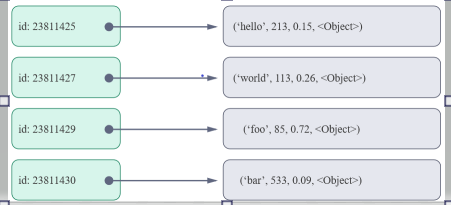
There are multiple implementations of the key-value store that are used in production grade systems worldwide. Some example open source implementations are Redis, CouchDB, Mongo, and Cassandra (which uses a b-tree as the underlying datastructure).

### Overview of Recursion
https://app.dataquest.io/m/228/overview-of-recursion/2/recursion-is-thinking-in-recursion

In [1]:
example_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

def iterative_summation(values):
    total = 0
    for value in values:
        total += value
    return total

iterative_summation(example_list)

55

In [3]:
def recursive_summation(values):
    if len(values) <= 1:
        return values[0]
    return values[0] + recursive_summation(values[1:])

recursive_summation(example_list)

55

In [5]:
search_list = ['apple', 'orange', 'pear', 'fig', 'passionfruit']

def search(strings, term, index=0):
    if strings[0] == term:
        return index
    if len(strings) <= 1:
        return -1
    return search(strings[1:], term, index=index+1)

apple_index = search(search_list, 'apple')
pear_index = search(search_list, 'pear')
foo_index = search(search_list, 'foo')
print(apple_index,pear_index, foo_index)

0 2 -1


In [24]:
# f = open('random_integers.txt', 'r')
# random_integers = [int(line) for line in f.readlines()]

def summation(values):
    if len(values) == 0:
        return 0
    if len(values) == 1:
        return values[0]

    midpoint = len(values) // 2
    return summation(values[:midpoint]) + summation(values[midpoint:])   

import random
random_integers = [random.randint(1, 10) for i in range(10)]
divide_and_conquer_sum = summation(random_integers)
print(divide_and_conquer_sum)

49


In [3]:
# merge two sorted lists to create a new sorted list
def merge(left_list, right_list):
    sorted = []
    while left_list and right_list:
        if left_list[0] < right_list[0]:
            sorted.append(left_list.pop(0))
        else:
            sorted.append(right_list.pop(0))
    sorted += left_list
    sorted += right_list
    return sorted

In [5]:
# merge sort

def merge_sort(unsorted):
    if len(unsorted) < 2:
        return unsorted
    midpoint = len(unsorted) // 2
    left_side = merge_sort(unsorted[:midpoint])
    right_side = merge_sort(unsorted[midpoint:])
    sorted = merge(left_side, right_side)
    return sorted

random_sorted = merge_sort(random_integers)
random_sorted

[1, 1, 1, 2, 3, 4, 5, 7, 8, 9]

In [15]:
# Tower of Hanoi
def printMove(fr, to):
    print('move from ' + str(fr) + ' to ' + str(to))
    
def Tower(n, fr, to, spare):
    if n == 1:
        printMove(fr,to)
    else:
        Tower(n-1, fr, spare, to)
        Tower(1, fr, to, spare)
        Tower(n-1, spare, to, fr)
Tower(2,'f','t','s')        

move from f to s
move from f to t
move from s to t


In [23]:
# palindrome
def isPalindrowm(s):
    def toChars(s):
        s = s.lower()
        ans =''
        for c in s:
            if c in 'abcdefghijklmnopqrstuvwxyz':
                ans = ans+c
        return ans
    
    def isPal(s):
        if len(s) <= 1:
            return True
        else:
            return s[0] == s[-1] and isPal(s[1:-1])
    return isPal(toChars(s))

isPalindrowm('andnyrhjjw')

False

In [16]:
l = [1,2,3,4,5]
l[1:-1]

[2, 3, 4]

### Binary Tree
https://app.dataquest.io/m/229/introduction-to-binary-trees

In [23]:
class Node(object):
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinaryTree(object):
    def __init__(self, root):
        self.root = Node(root)

tree = BinaryTree(1)
tree.root.left = Node(2)
tree.root.right = Node(3)
tree.root.left.left = Node(4)
tree.root.left.right = Node(5)
tree.root.right.left = Node(6)
tree.root.right.right = Node(7)
tree.root.right.right.right = Node(8)
print(tree.root.right.right.right.va)

8


In [22]:
class Queue(object):
    def __init__(self):
        self.items = []
        
    def enqueue(self, item):
        self.items.insert(0, item)
        
    def dequeue(self):
        if not self.is_empty():
            return self.items.pop()
        
    def is_empty(self):
        return len(self.items) == 0
    
    def peek(self):
        if not self.is_empty():
            return self.items[-1].value
        
    def __len__(self):
        return len(self.items)
        
class Node(object):
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinaryTree(object):
    def __init__(self, root):
        self.root = Node(root)
    
    def print_tree(self, traversal_type):
        if traversal_type == 'preorder':
            return self.preorder_print(tree.root, '')
        elif traversal_type == 'inorder':
            return self.inorder_print(tree.root, '')
        elif traversal_type == 'postorder':
            return self.postorder_print(tree.root, '')
        elif traversal_type == 'levelorder':
            return self.levelorder_print(tree.root)
        else:
            print(f'traversal type {traversal_type} is not supported')
            return False
    
    def preorder_print(self, start, traversal):
        """ root -> left -> right"""
        if start: # if node not empty
            traversal += (str(start.value) + '-')
            traversal = self.preorder_print(start.left, traversal)
            traversal = self.preorder_print(start.right, traversal)
        return traversal

    # In-order traversal
    def inorder_print(self, start, traversal):
        """ left -> root -> right"""
        if start: 
            traversal = self.inorder_print(start.left, traversal)
            traversal += (str(start.value) + '-')
            traversal = self.inorder_print(start.right, traversal)
        return traversal
   
    # Post-order traversal
    def postorder_print(self, start, traversal):
        """ left -> right -> root """
        if start: 
            traversal = self.postorder_print(start.left, traversal)
            traversal = self.postorder_print(start.right, traversal)
            traversal += (str(start.value) + '-')
        return traversal
    
    # Level-order traversal
    def levelorder_print(self, start):
        if start is None:
            return
        
        queue = Queue()
        queue.enqueue(start)
        traversal = ''
        while len(queue) > 0:
            traversal += (str(queue.peek()) + '-')
            node = queue.dequeue()
            if node.left:
                queue.enqueue(node.left)
            if node.right:
                queue.enqueue(node.right)
        return traversal
    
tree = BinaryTree(1)
tree.root.left = Node(2)
tree.root.right = Node(3)
tree.root.left.left = Node(4)
tree.root.left.right = Node(5)
tree.root.right.left = Node(6)
tree.root.right.right = Node(7)

#            1
#         /     \
#        2       3
#       / \     / \
#      4   5   6   7

print('preorder:  ', tree.print_tree('preorder'))
print('inorder:   ', tree.print_tree('inorder'))
print('postorder: ', tree.print_tree('postorder'))
print('levelorder:', tree.print_tree('levelorder'))

preorder:   1-2-4-5-3-6-7-
inorder:    4-2-5-1-6-3-7-
postorder:  4-5-2-6-7-3-1-
levelorder: 1-2-3-4-5-6-7-


In [69]:
# Binary search tree: left children less than the parent, wise versa
class Node:
    def __init__(self, data=None):
        self.data = data
        self.left = None
        self.right = None

class BST:
    def __init__(self):
        self.root = None
    
    def insert(self, data):
        if self.root is None:
            self.root = Node(data)
        else:
            self._insert(data, self.root)

    def _insert(self, data, cur_node):
        if data < cur_node.data:
            if cur_node.left is None:
                cur_node.left = Node(data)
            else:
                self._insert(data, cur_node.left)
        elif data > cur_node.data:
            if cur_node.right is None:
                    cur_node.right = Node(data)
            else:
                self._insert(data, cur_node.right)
        else:
            print('the value is already in tree.')
    
    def find(self, data):
        if self.root:
            is_found = self._find(data, self.root)
            if is_found:
                return True
            return False
        else:
            return None
        
    def _find(self, data, cur_node):
        if data > cur_node.data and cur_node.right:
            return self._find(data, cur_node.right)
        elif data < cur_node.data and cur_node.left:
            return self._find(data, cur_node.left)
        if data == cur_node.data:
            return True
        
    # height of binary tree: longest path to leaf
    def height(self, node):
        if node is None:
            return -1
        left_height = self.height(node.left)
        right_height = self.height(node.right)
        return 1+ max(left_height, right_height)

bst = BST()
bst.insert(4)
bst.insert(2)
bst.insert(8)
bst.insert(5)
bst.insert(10)

print(bst.find(7))
print(bst.height(bst.root))   

False
2


In [7]:
class Node:
    def __init__(self, value=None):
        self.value = value
        self.left = None
        self.right = None

class BinaryTree:
    def __init__(self, root=None):
        self.root = root
    
    def insert(self, value):
        if not self.root:
            self.root = Node(value=value)
        elif not self.root.left:
            self.root.left = Node(value=value)
        elif not self.root.right:
            self.root.right = Node(value=value)

tree = BinaryTree(Node(value=1))
tree.insert(2)
tree.insert(3)
tree.insert(4)
root = tree.root.value
left = tree.root.left.value
right = tree.root.right.value
print(root, left, right)

1 2 3


In [5]:
# level order insert
a = [1,2,3]
if a:
    print(a)

[1, 2, 3]


In [6]:
a[2]

3

In [2]:
level_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

class Node:
    def __init__(self, value=None):
        self.value = value
        self.left = None
        self.right = None

    def __repr__(self):
        return "<Node: {}>".format(self.value)

class BinaryTree:
    def __init__(self, values=None):
        self.root = None
        if values:
            self.insert(values)
    
    def insert(self, values, index=0):
        node = None
        if index < len(values):
            node = Node(value=values[index])
            if not self.root:
                self.root = node
            node.left = self.insert(values, index=index*2+1)
            node.right = self.insert(values, index=index*2+2)
            
        return node

tree = BinaryTree(level_order)
root = tree.root.value
child = tree.root.left.right.left.value
print(root, child)

1 10


In [3]:
level_order = [1, 2, 3, 4, 5]
class BaseBinaryTree:
    def __init__(self, values=None):
        self.root = None
        if values:
            self.insert(values)
    
    def insert(self, values, index=0):
        node = None
        if index < len(values):
            node = Node(value=values[index])
            if not self.root:
                self.root = node
            node.left = self.insert(values, index=index*2+1)
            node.right = self.insert(values, index=index*2+2)
        return node
    
class BinaryTree(BaseBinaryTree):
    def is_parent(self, node):
        return bool(node.left or node.right)
    
    def is_interior(self, node):
        return (not node == self.root) and self.is_parent(node)
    
    def is_leaf(self, node):
        return (not node == self.root) and not self.is_interior(node)

tree = BinaryTree(level_order)
root_parent = tree.is_parent(tree.root)
parent = tree.is_parent(tree.root.left)
interior = tree.is_interior(tree.root.left)
root_leaf = tree.is_leaf(tree.root)
leaf = tree.is_leaf(tree.root.left.left)
print(root_leaf, leaf)

False True


In [89]:
class BinaryTree(BaseBinaryTree):
    def preorder_traverse(self, node):
        if not node:
            return []
        return (
            [node.value] +
            self.preorder_traverse(node.left) +
            self.preorder_traverse(node.right)
        )
    
    def inorder_traverse(self, node):
        if not node:
            return []
        return (
            self.inorder_traverse(node.left) +
            [node.value] +
            self.inorder_traverse(node.right)
        )
    
    def postorder_traverse(self, node):
        if not node:
            return []
        return (
            self.postorder_traverse(node.left) +
            self.postorder_traverse(node.right) +
            [node.value]
        )

tree = BinaryTree(level_order)
preorder = tree.preorder_traverse(tree.root)
inorder = tree.inorder_traverse(tree.root)
postorder = tree.postorder_traverse(tree.root)

print('preorder:  ', preorder)
print('inorder:   ', inorder)
print('postorder: ', postorder)

preorder:   [1, 2, 4, 5, 3]
inorder:    [4, 2, 5, 1, 3]
postorder:  [4, 5, 2, 3, 1]


In [94]:
class BinaryTree(BaseBinaryTree):
    def preorder_traverse(self, node):
        if not node:
            return []
        return (
            [node.value] +
            self.preorder_traverse(node.left) +
            self.preorder_traverse(node.right)
        )
    def depth(self, node):
        if not node:
            return 0
        return max(self.depth(node.left), self.depth(node.right)) + 1
    
    def num_nodes(self, node):
        return len(self.preorder_traverse(node))
    
    def is_balanced(self, node):
        if not node:
            return True
        left_height = self.depth(node.left)
        right_height = self.depth(node.right)
        if abs(left_height-right_height) <= 1:
            return True
        else:
            return False
    
tree = BinaryTree(level_order)
depth = tree.depth(tree.root)
num_nodes = tree.num_nodes(tree.root)
print(depth, num_nodes)
balanced = tree.is_balanced(tree.root)
print(balanced)

3 5
True


### Implementing a Binary Heap
https://app.dataquest.io/m/230/implementing-a-binary-heap

In [98]:
# Min Heap: each parent node is less than or equal to its child node. 
# Max heap: each parent node is greater than or equal to its child node.
# inserting a node into a Max heap: add child, compare parent and current node, swap if necessary

class Node:
    def __init__(self, value=None):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

    def __repr__(self):
        # Helpful method to keep track of Node values.
        return "<Node: {}>".format(self.value)    

class MaxHeap:
    def __init__(self):
        self.root = None
    
    def insert(self, value):
        node = Node(value=value)
        if not self.root:
            self.root = node
            return node
        
        if self.root.value >= node.value: # if current root >= new node, 
            node.parent = self.root # make root node a parent
            if not self.root.left:
                self.root.left = node 
            elif not self.root.right:
                self.root.right = node
            return node
        
        old_root = self.root 
        node.left = old_root.left
        node.right = old_root.right
        self.root = node
        
        if not self.root.left:
            self.root.left = old_root
        elif not self.root.right:
            self.root.right = old_root
        return node
                
heap = MaxHeap()
heap.insert(3)
heap.insert(9)
heap.insert(11)
root = heap.root.value
left = heap.root.left.value
right = heap.root.right.value 
print(root, left, right)

11 3 9


In [107]:
# use list as the internal data structure for a max-heap.
import math
class BaseMaxHeap():
    def __init__(self):
        self.nodes = []
    
    def insert(self, value):
        self.nodes.append(value)
        index = len(self.nodes) - 1
        parent_index = math.floor((index-1)/2)
        
        while index > 0 and self.nodes[parent_index] < self.nodes[index]:
            self.nodes[parent_index], self.nodes[index] = self.nodes[index], self.nodes[parent_index]
            index = parent_index
            parent_index = math.floor((index-1)/2)
        return self.nodes
    
heap = MaxHeap()
heap.insert(3)
heap.insert(9)
heap.insert(11)
nodes = heap.nodes
print(nodes)

[11, 3, 9]


In [122]:
class MaxHeap(BaseMaxHeap):
    def insert_multiple(self, values):
        for value in values:
            self.insert(value)

    def max(self):
        return self.nodes[0]

    def pop(self): # remove the root element from the max-heap
        root = self.nodes[0]
        self.nodes[0] = self.nodes[-1]
        self.nodes = self.nodes[:-1]
        index = 0
        left_child_idx = 2*index + 1
        right_child_idx = 2*index + 2
        
        while max(left_child_idx, right_child_idx) < len(self.nodes) - 1:
            swap_index = left_child_idx
            if self.nodes[left_child_idx] < self.nodes[right_child_idx]:
                swap_index = right_child_idx
            if self.nodes[swap_index] < self.nodes[index]:
                return root
            
            self.nodes[swap_index], self.nodes[index] = self.nodes[index], self.nodes[swap_index]
            index = swap_index
            left_child_idx = 2*index + 1
            right_child_idx = 2*index + 2
        return root

    def top_n_elements(self, n):
        return [self.pop() for _ in range(n)]
            
heap_list = [3,9,5,11,4,6]
heap = MaxHeap()
heap.insert_multiple(heap_list)
heap_max = heap.max()
print('heap max after insertion: ', heap_max)
heap_max = heap.pop()
print('first pop: ', heap_max)
heap_max = heap.pop()
print('2nd pop: ', heap_max)
top_3 = heap.top_n_elements(3)
print(f'top_3 is {top_3}')

heap max after insertion:  11
first pop:  11
2nd pop:  9
top_3 is [6, 3, 4]


In [129]:
# using heapq
import csv
import heapq
with open('Raw_data/amounts.csv', 'r') as f:
    reader = csv.reader(f)
    heap_list = list(reader)[1:]
    
# find the top 100 rows with the second column as the key    
top_100 = heapq.nlargest(100, heap_list, key=lambda x: x[1])
print(top_100[:3])

[['141100', '999.9'], ['32406', '999.88'], ['82298', '999.52']]


In [131]:
import time
import random
heap_list = list(range(10 * 100 * 5000))
random.shuffle(heap_list)
    
start = time.time()
sorted(heap_list, reverse=True)[:100]
print("Sorting search took: {} seconds".format(time.time() - start))

start = time.time()
heapq.nlargest(100, heap_list)
print("Heap search took: {} seconds".format(time.time() - start))

Sorting search took: 5.08812952041626 seconds
Heap search took: 1.0156407356262207 seconds


### Working with Binary Search Trees
https://app.dataquest.io/m/231/working-with-binary-search-trees

In [33]:
"""
BST = Every value in a nodes' left sub-tree has a value that is less than or equal to the parent node
      Every value in a nodes' right sub-tree has a value that is greater than or equal to the parent node
"""
class Node:
    def __init__(self, value=None):
        self.left = None
        self.right = None
        self.value = value
    
    def __str__(self):
        return "<Node: {}>".format(self.value)

class BaseBST:
    def __init__(self):
        self.node = None
    
    def insert(self, value=None):
        node = Node(value=value)
        if not self.node:
            self.node = node
            self.node.right = BaseBST()
            self.node.left = BaseBST()
            return
        
        if value > self.node.value:
            if self.node.right:
                self.node.right.insert(value=value)
            else:
                self.node.right.node = node
            return
        
        if self.node.left:
            self.node.left.insert(value=value)
        else:
            self.node.left.node = node
    
    def inorder(self, tree):
        if not tree or not tree.node:
            return []
        return (
            self.inorder(tree.node.left) +
            [tree.node.value] +
            self.inorder(tree.node.right)
        )

    def search(self, value):
        if not self.node:
            return False
        if value == self.node.value:
            return True
        result = False
        if self.node.left:
            result = self.node.left.search(value)
        if self.node.right:
            result = self.node.right.search(value)
        return result
    
bst = BaseBST()
bst.insert(4)
bst.insert(2)
bst.insert(1)
bst.insert(5)
bst.insert(3)
root = bst.node.value
print(root)

4


In [38]:
class BST(BaseBST):
    def insert_multiple(self, values):
        for value in values:
            self.insert(value)
    
    def depth(self, node):
        if not node:
            return 0
        if not node.left and not node.right:
            return 1
        return max(self.depth(node.left.node), self.depth(node.right.node)) + 1
    
    def is_balanced(self):
        if not self.node:
            return True
        left_subtree = self.depth(self.node.left.node)
        right_subtree = self.depth(self.node.right.node)
        return abs(left_subtree - right_subtree) < 2

    def left_rotate(self):
        old_node = self.node                # save old self.node
        new_node = self.node.right.node     # set new root note as old.node.right.node
        if not new_node:                    # stop is new node is not a node
            return
        new_right_sub = new_node.left.node  # prepare to move new_node.left.node to the left of new node
        self.node = new_node                # replace root node with new_node
        old_node.right.node = new_right_sub # move new_node.left.node as right node for the old root note
        new_node.left.node = old_node
    
    def right_rotate(self):
        old_node = self.node
        new_node = self.node.left.node
        if not new_node:
            return
        
        new_left_sub = new_node.right.node
        self.node = new_node
        old_node.left.node = new_left_sub
        new_node.right.node = old_node

bst_values = range(20)
bst = BST()
bst.insert_multiple(bst_values)
sorted_inorder = bst.inorder(bst)
print(sorted_inorder)
does_exist_1 = bst.search(1)
print('does_exist_1?', does_exist_1)
does_exist_27 = bst.search(27)
print('does_exist_27?', does_exist_27)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
does_exist_1? True
does_exist_27? False


In [39]:
# check for tree-balance BST
bst_values = [3,2,5,4,7]
bst = BST()
bst.insert_multiple(bst_values)
balanced = bst.is_balanced()
print(balanced)

True


In [40]:
# self-balancing tree using rotations
bst = BST()
bst.insert_multiple(bst_values)
bst.left_rotate()
left_balanced = bst.is_balanced()
bst.right_rotate()
right_balanced = bst.is_balanced()
print(left_balanced, right_balanced)

True True


In [41]:
# AVL (Adelson-Velsky and Landis) Tree: self_balancing
class BST(BaseBST):
    def insert(self, value=None):
        node = Node(value=value)
        if not self.node:
            self.node = node
            self.node.left = BST()
            self.node.right = BST()
            return
        
        if value > self.node.value:
            if self.node.right:
                self.node.right.insert(value=value)
            else:
                self.node.right.node = node
        else:
            if self.node.left:
                self.node.left.insert(value=value)
            else:
                self.node.left.node = node
        
        difference = self.depth(self.node.left.node) - self.depth(self.node.right.node)
        
        # Left side case.
        if difference > 1:
            # Left-right case.
            if value > self.node.right.node.value:
                self.node.left.left_rotate()
            # Left-left case.
            self.right_rotate()
            
        # Right side case.
        if difference < -1:
            # Right-left case.
            if value <= self.node.left.node.value:
                self.node.left.right_rotate()
            self.left_rotate()
    
    def insert_multiple(self, values):
        for value in values:
            self.insert(value)
            
    def depth(self, node):
        if not node:
            return 0
        if not node.left and not node.right:
            return 1
        
        return max(self.depth(node.left.node), self.depth(node.right.node)) + 1
    
    def is_balanced(self):
        if not self.node:
            return True
        
        left_subtree = self.depth(self.node.left.node)
        right_subtree = self.depth(self.node.right.node)
        
        return abs(left_subtree - right_subtree) < 2

bst = BST()
bst.insert_multiple(bst_values)
inorder = bst.inorder(bst)
is_bst_balanced = bst.is_balanced()
print(is_bst_balanced)

True


In [52]:
class Node:
    def __init__(self, key=None, value=None):
        self.left = None
        self.right = None
        self.key = key
        self.value = value

    def __str__(self):
        return "<Node: {}>".format(self.value)
    
class BST(BaseBST):
    def __init__(self, index=None):
        self.node = None
        self.index = index
    
    def insert_multiple(self, values):
        for value in values:
            self.insert(value)
    
    def depth(self, node):
        if not node:
            return 0
        if not node.left and not node.right:
            return 1
        
        return max(self.depth(node.left.node), self.depth(node.right.node)) + 1
    
    def insert(self, value=None):  # value = list
        key = value
        if self.index:
            key = value[self.index]
        node = Node(key=key, value=value)
        
        if not self.node:
            self.node = node
            self.node.left = BST(index=self.index)
            self.node.right = BST(index=self.index)
            return
        
        if key > self.node.key:
            if self.node.right:
                self.node.right.insert(value=value)
            else:
                self.node.right.node = node
        else:
            if self.node.left:
                self.node.left.insert(value=value)
            else:
                self.node.left.node = node
        
        difference = self.depth(self.node.left.node) - self.depth(self.node.right.node)
        
        # Left side case.
        if difference > 1:
            # Left-right case.
            if key > self.node.right.node.key:
                self.node.left.left_rotate()
            # Left-left case.
            self.right_rotate()
            
        # Right side case.
        if difference < -1:
            # Right-left case.
            if key <= self.node.left.node.key:
                self.node.left.right_rotate()
            self.left_rotate()
    
    def search(self, key):
        if not self.node:
            return False
        if key == self.node.key:
            return True
        
        result = False
        if self.node.left:
            result = self.node.left.search(key)
        if self.node.right:
            result = self.node.right.search(key)
        return result
    
    def left_rotate(self):
        old_node = self.node
        new_node = self.node.right.node
        if not new_node:
            return
        
        new_right_sub = new_node.left.node
        self.node = new_node
        old_node.right.node = new_right_sub
        new_node.left.node = old_node
    
    def right_rotate(self):
        old_node = self.node
        new_node = self.node.left.node
        if not new_node:
            return
     
bst_values = [3,2,5,4,7]
bst = BST()
bst.insert_multiple(bst_values)
inorder = bst.inorder(bst)
bst_list = BST(index=2)
bst_list_values = [['hello', 'world', 3],['goodbye', 'world', 2],['foo', 'bar', 5],['fizz', 'buzz', 4],['lorem', 'ipsum', 7],['this', 'that', 6],
['enough', 'programming', 8]]
bst_list.insert_multiple(bst_list_values)
inorder_list = bst.inorder(bst_list)
print(inorder_list)

[['goodbye', 'world', 2], ['hello', 'world', 3], ['fizz', 'buzz', 4], ['foo', 'bar', 5], ['this', 'that', 6], ['lorem', 'ipsum', 7], ['enough', 'programming', 8]]


In [43]:
print(help(bst.insert))
print(isinstance(bst, BST))
print(issubclass(BST,BaseBST))

Help on method insert in module __main__:

insert(value=None) method of __main__.BST instance

None
True
True


### B-trees and B+ trees

In [44]:
# Block (512 bytes) on disk is defined by Track# and Sector#
# every byte in a block is defined by offset, starting from zero

<div>
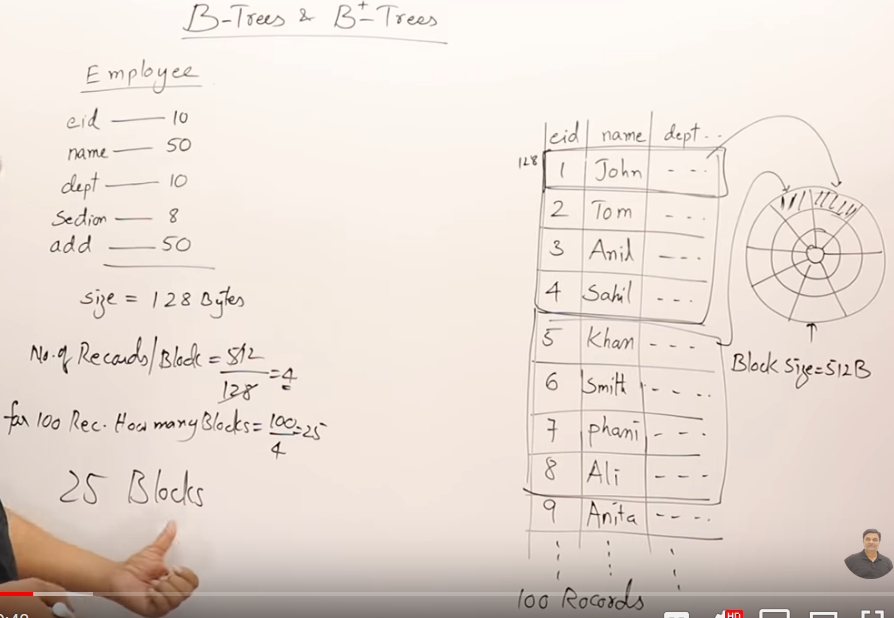
</div>

<div>
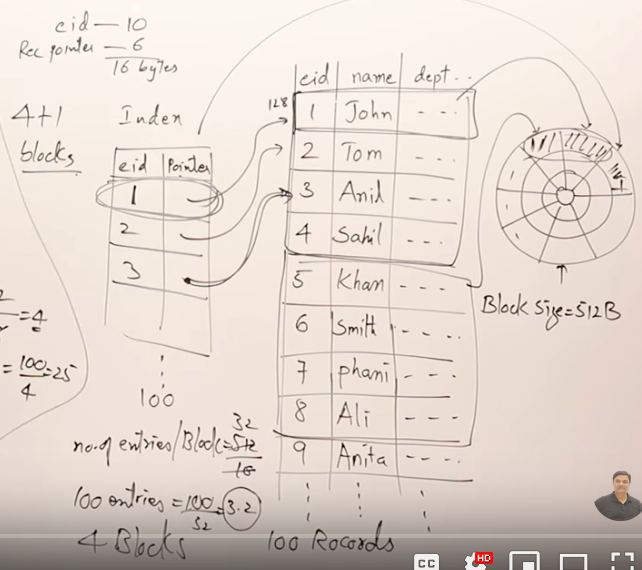
</div>

multi-level indexing
<div>
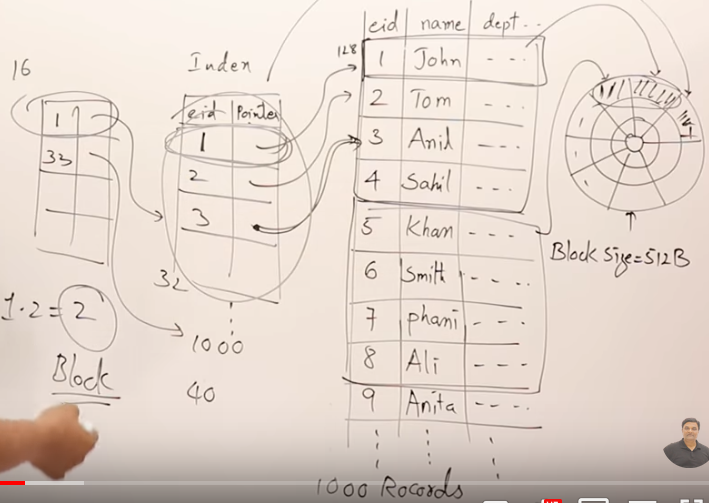  
<div/>

self_managed multi-level indexing: B-trees and B+trees
m-way search tree: each node can have no more than m children, and m-1 keys. binary tree is 2-way tree with 1 key
<div>
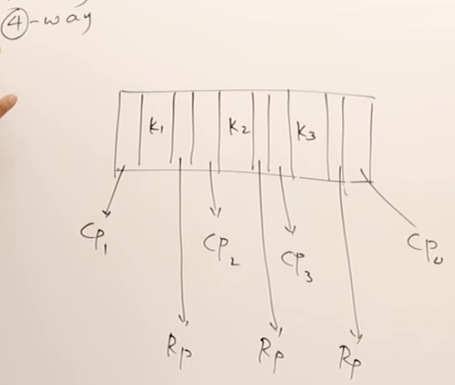
<div/>

In [107]:
# store and search list of lists
class Node:
    def __init__(self, key=None, value=None):
        self.left = None
        self.right = None
        self.key = key
        self.value = value

    def __str__(self):
        return "<Node: {}>".format(self.value)
    
class BST(BaseBST):
    def __init__(self, index=None):
        self.node = None
        self.index = index
    
    def insert_multiple(self, values):
        for value in values:
            print('from insert_multiple:', value)
            self.insert(value)
    
    def depth(self, node):
        if not node:
            return 0
        if not node.left and not node.right:
            return 1
        
        return max(self.depth(node.left.node), self.depth(node.right.node)) + 1
    
    def insert(self, value=None):  # value = list
        key = value
        if self.index:
            key = value[self.index]
        node = Node(key=key, value=value)
        
        if not self.node:
            self.node = node
            self.node.left = BST(index=self.index)
            self.node.right = BST(index=self.index)
            return
        
        if key > self.node.key:
            if self.node.right:
                self.node.right.insert(value=value)
            else:
                self.node.right.node = node
        else:
            if self.node.left:
                self.node.left.insert(value=value)
            else:
                self.node.left.node = node
        
        difference = self.depth(self.node.left.node) - self.depth(self.node.right.node)
        
        # Left side case.
        if difference > 1:
            # Left-right case.
            if key > self.node.right.node.key:
                self.node.left.left_rotate()
            # Left-left case.
            self.right_rotate()
            
        # Right side case.
        if difference < -1:
            # Right-left case.
            if key <= self.node.left.node.key:
                self.node.left.right_rotate()
            self.left_rotate()
    
    def search(self, key):
        if not self.node:
            return False
        if key == self.node.key:
            return True
        
        result = False
        if self.node.left:
            result = self.node.left.search(key)
        if self.node.right:
            result = self.node.right.search(key)
        return result
    
    def left_rotate(self):
        old_node = self.node
        new_node = self.node.right.node
        if not new_node:
            return
        
        new_right_sub = new_node.left.node
        self.node = new_node
        old_node.right.node = new_right_sub
        new_node.left.node = old_node
    
    def right_rotate(self):
        old_node = self.node
        new_node = self.node.left.node
        if not new_node:
            return
     
    def greater_than(self, key):
        """returns a list of the values greater than the given key"""
        if not self.node:
            return []
        
        values = []
        if self.node.left:
            values += self.node.left.greater_than(key)
        if self.node.right:
            values += self.node.right.greater_than(key)
        if self.node.key > key:
            values.append(self.node.value)
        return values

bst = BST()
bst.insert_multiple(bst_values)
greater = bst.greater_than(5)

bst_list = BST(index=2)
bst_list.insert_multiple(bst_list_values)
greater_list = bst_list.greater_than(5)
print()
print(greater_list)

from insert_multiple: 3
from insert_multiple: 2
from insert_multiple: 5
from insert_multiple: 4
from insert_multiple: 7
from insert_multiple: ['hello', 'world', 3]
from insert_multiple: ['goodbye', 'world', 2]
from insert_multiple: ['foo', 'bar', 5]
from insert_multiple: ['fizz', 'buzz', 4]
from insert_multiple: ['lorem', 'ipsum', 7]
from insert_multiple: ['this', 'that', 6]
from insert_multiple: ['enough', 'programming', 8]

[['this', 'that', 6], ['enough', 'programming', 8], ['lorem', 'ipsum', 7]]


In [56]:
[1,2,3]+[4,5]

[1, 2, 3, 4, 5]

In [78]:
with open('Raw_data\\amounts.csv', 'r') as f:
    data = f.readlines()
print(data[0:10])

['"Time","Amount"\n', '0,149.62\n', '0,2.69\n', '1,378.66\n', '1,123.5\n', '2,69.99\n', '2,3.67\n', '4,4.99\n', '7,40.8\n', '7,93.2\n']


In [2]:
import csv
with open('Raw_data\\amounts.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    amount_rows = list((int(float(r[0])), float(r[1])) for r in reader)
print(amount_rows[0:15])

[(0, 149.62), (0, 2.69), (1, 378.66), (1, 123.5), (2, 69.99), (2, 3.67), (4, 4.99), (7, 40.8), (7, 93.2), (9, 3.68), (10, 7.8), (10, 9.99), (10, 121.5), (11, 27.5), (12, 58.8)]


In [3]:
print(len(amount_rows))

284807


## @Francois's code

In [1]:
class Node:
    def __init__(self, key=None, value=None):
        self.left = None
        self.right = None
        self.value = value
        self.key = key
    
    def __str__(self):
        return "<Node: {}>".format(self.value)

class BST:
    def __init__(self, index=None):
        self.node = None
        self.index = index
    
    def insert_multiple(self, values):
        for value in values:
            self.insert(value)
    
    def insert(self, value=None):
        key = value
        if self.index:
            key = value[self.index]
        node = Node(key=key, value=value)
        
        if not self.node:
            self.node = node
            self.node.left = BST(index=self.index)
            self.node.right = BST(index=self.index)
            return
        
        if key > self.node.key:
            if self.node.right:
                self.node.right.insert(value=value)
            else:
                self.node.right.node = node
        else:
            if self.node.left:
                self.node.left.insert(value=value)
            else:
                self.node.left.node = node
        
        difference = self.depth(self.node.left.node) - self.depth(self.node.right.node)
        
        if difference > 1:
            if self.node.right.node and key > self.node.right.node.key:
                self.node.left.left_rotate()
            self.right_rotate()
            
        if difference < -1:
            if self.node.left.node and key <= self.node.left.node.key:
                self.node.left.right_rotate()
            self.left_rotate()
    
    def inorder(self, tree):
        if not tree or not tree.node:
            return []
        return (
            self.inorder(tree.node.left) +
            [tree.node.value] +
            self.inorder(tree.node.right)
        )
    
    def search(self, key):
        if not self.node:
            return False
        if key == self.node.key:
            return True
        
        result = False
        if self.node.left:
            result = self.node.left.search(key)
        if self.node.right:
            result = self.node.right.search(key)
        return result

    def depth(self, node):
        if not node:
            return 0
        if not node.left and not node.right:
            return 1
        
        return max(self.depth(node.left.node), self.depth(node.right.node)) + 1
    
    def left_rotate(self):
        old_node = self.node
        new_node = self.node.right.node
        if not new_node:
            return
        
        new_right_sub = new_node.left.node
        self.node = new_node
        old_node.right.node = new_right_sub
        new_node.left.node = old_node
    
    def right_rotate(self):
        old_node = self.node
        new_node = self.node.left.node
        if not new_node:
            return
        
        new_left_sub = new_node.right.node
        self.node = new_node
        old_node.left.node = new_left_sub
        new_node.right.node = old_node

    def is_balanced(self):
        if not self.node:
            return True
        
        left_subtree = self.depth(self.node.left.node)
        right_subtree = self.depth(self.node.right.node)
        
        return abs(left_subtree - right_subtree) < 2
    
    def greater_than(self, key):
        """takes in a key and returns a list of the values greater than the given key"""
        if not self.node:
            return []
        values = []
        if self.node.left:
            values += self.node.left.greater_than(key)
        if self.node.right:
            values += self.node.right.greater_than(key)
        if self.node.key > key:
            values.append(self.node.value)
        return values

import time
start = time.time()
import csv
with open('amounts.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    # query on the second column, the amounts field to find rows
    amount_rows = list((int(float(r[0])), float(r[1])) for r in reader)
    # amount_rows = amount_rows[0:1000]

durations_insert=[]
durations_search=[]

bst = BST(index=1)
for i in range(1000, 5000, 500):
    data = amount_rows[0:i]
    bst.insert_multiple(data)
    ins_time = time.time()
    durations_insert.append(ins_time - start)
# print(f'time to complete insert = {time.time() - start}'.format(time.time() - start), 2)
    csv_query = bst.greater_than(10)
    durations_search.append(time.time() - ins_time)
    print(csv_query[0:5])

[(553, 10.08), (373, 10.29), (206, 10.27), (449, 10.2), (735, 10.38)]
[(553, 10.08), (449, 10.2), (553, 10.08), (206, 10.27), (373, 10.29)]
[(553, 10.08), (553, 10.08), (1323, 10.09), (449, 10.2), (449, 10.2)]
[(553, 10.08), (553, 10.08), (553, 10.08), (1323, 10.09), (1872, 10.12)]
[(553, 10.08), (553, 10.08), (553, 10.08), (553, 10.08), (1323, 10.09)]
[(2736, 10.02), (553, 10.08), (553, 10.08), (553, 10.08), (553, 10.08)]
[(2736, 10.02), (553, 10.08), (553, 10.08), (553, 10.08), (2736, 10.02)]
[(2736, 10.02), (2736, 10.02), (553, 10.08), (553, 10.08), (553, 10.08)]


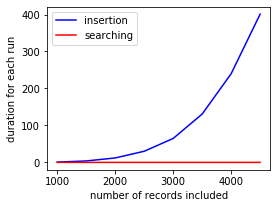

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(4,3))
plt.plot(range(1000, 5000, 500), durations_insert, color='blue')
plt.plot(range(1000, 5000, 500), durations_search, color='red')
plt.xlabel('number of records included')
plt.ylabel('duration for each run')
plt.legend(['insertion', 'searching'])

### Performance Boosts of Using a B-Tree
https://app.dataquest.io/m/232/performance-boosts-of-using-a-b-tree

Constraints for a B-tree of order m:
    1. the root has >= 2 children
    2. every node has <= m children, 
    3. every non-leaf, non-root node has >= m/2 children
    4. a non-leaf node with k children has k-1 keys
    5. all leaves appear at the same level
To insert a key, first loop through root to find the right leaf note, then loop through the leaf note to find the right position.
If the leaf is full, after finding the right child node, split the node to two, insert theh new key, then promote the median key up one level.

In [28]:
import csv
import linecache
import timeit

def find_row():
    return list(csv.reader(linecache.getline('Raw_data\\amounts.csv', 282748)))
print(find_row())
print(timeit.timeit('find_row()', 'from __main__ import find_row', number=100))

[['1'], ['7'], ['1'], ['1'], ['1'], ['6'], ['', ''], ['9'], ['.'], ['8'], ['5'], []]
0.0005023999999593798


In [43]:
def brute_search():
    with open('Raw_data\\amounts.csv') as f:
        reader = csv.reader(f)
        rows = []
        for row in reader:
            if reader.line_num in [4, 41231, 284400]:
                rows.append(row)
        return rows

def cache_search():
    """linecache module exposes a function getline() which takes in a file, a line number, 
       then retrieves that line from the file"""
    return list(csv.reader(linecache.getline('Raw_data\\amounts.csv', i) for i in [4, 41231, 284400]))

print(timeit.timeit('brute_search()', 'from __main__ import brute_search', number=50))
print(timeit.timeit('cache_search()', 'from __main__ import cache_search', number=50))
print(brute_search())
print(cache_search())

13.787184600001638
0.06272309999985737
[['1', '378.66'], ['40596', '23.88'], ['172406', '41.97']]
[['1', '378.66'], ['40596', '23.88'], ['172406', '41.97']]


In [2]:
class Node:
    """An index is a data structure that contains a key and a direct reference to a row of data.
       The index could stores a key like a timestamp and a value like file's line number """
    def __init__(self, keys=None, children=None):
        # nodes of the tree contains number of keys and reference
        self.keys = keys or []
        self.children = children or []
    
    def is_leaf(self):
        return len(self.children) == 0

    def __repr__(self):
        return "<Node: {}>".format(self.keys)    

class BTree: # a balanced tree having multiple keys and children in sorted order.
    def __init__(self, t): # t= the degree of the tree.  min keys/node = t-1, max keys = 2t-1, min childres = t
        self.t = t
        self.root = None

b_node = Node(keys=[1, 4, 8])
node_is_leaf = b_node.is_leaf()
print(node_is_leaf)
btree = BTree(3)
btree.root = b_node
keys = btree.root.keys
print(keys)

True
[1, 4, 8]


In [3]:
keys = [1, 2, 3, 5]
keys.insert(3, 4)
print(keys)

[1, 2, 3, 4, 5]


In [3]:
class Node:
    """An index is a data structure that contains a key and a direct reference to a row of data.
       The index could stores a key like a timestamp and a value like file's line number """
    
    def __init__(self, keys=None, children=None):
        # nodes of the tree contains number of keys and reference
        self.keys = keys or []
        self.children = children or []
    
    def is_leaf(self):
        return len(self.children) == 0

    def __repr__(self):
        return "<Node: {}>".format(self.keys)    

class BTree:
    def __init__(self, t): # init tree with degree and root
        self.t = t
        self.root = None

    def insert_multiple(self, keys):
        for key in keys:
            self.insert(key)
        
    def insert(self, key):
        if not self.root:
            self.root = Node(keys=[key])
            return
        
        if len(self.root.keys) == 2*self.t - 1:
            old_root = self.root
            self.root = Node()
            left, right, new_key = self.split(old_root)
            self.root.keys.append(new_key)
            self.root.children.append(left)
            self.root.children.append(right)
            
        self.insert_non_full(self.root, key)  
        
    def insert_non_full(self, node, key):  # add a new key in sorted order into a leaf node
        if node.is_leaf(): # if node has no children
            index = 0
            for k in node.keys:
                if key > k: index += 1  # if new key > older keys, keep moving
                else: break # if leaf node is full, break
            node.keys.insert(index, key)  # inserting new key at new index
            return
        
        index = 0  # if node has children, also loop through keys to find new index for the new key
        for k in node.keys:
            if key > k: index += 1 # find right index for a child
            else: break
                
        if len(node.children[index].keys) == 2*self.t - 1:  # if child is full, spliting it next
            left_node, right_node, new_key = self.split(node.children[index])
            node.keys.insert(index, new_key)
            node.children[index] = left_node
            node.children.insert(index+1, right_node)
            if key > new_key:
                index += 1
        self.insert_non_full(node.children[index], key)
    
    def split(self, node):
        left_node = Node(
            keys=node.keys[:len(node.keys)//2],
            children=node.children[:len(node.children)//2+1]
        )
        right_node = Node(
            keys=node.keys[len(node.keys)//2:],
            children=node.children[len(node.children)//2:]
        )
        key = right_node.keys.pop(0)
        return left_node, right_node, key
     
    def search(self, node, term):
        if not self.root:
            return False
        index = 0
        for key in node.keys:
            if key == term:
                return True
            if term > key:
                index += 1
        if node.is_leaf():
            return False
        
        return self.search(node.children[index], term)
       
# We have initialized a sample BTree for you.
btree = BTree(4)
b_node = Node(keys=[8, 18])
b_node.children.append(Node(keys=[-3, -2, -1, 2, 3, 5, 7]))
b_node.children.append(Node(keys=[9, 10, 11, 12, 14, 18, ]))
b_node.children.append(Node(keys=[17, 20, 44]))
btree.root = b_node
btree.insert(1)
btree.insert(4)
btree.insert(6)
btree.insert(13)
btree.insert(17)
btree.insert(22)
child_keys = btree.root.children[1].keys
print(child_keys)

[3, 4, 5, 6, 7]


In [4]:
btree = BTree(5)
btree.insert_multiple(range(0, 100))
child_keys = btree.root.children[-1].children[0].keys
print(child_keys)

[50, 51, 52, 53]


In [5]:
btree = BTree(4)
btree.insert_multiple(range(0,100))
search_6 = btree.search(btree.root, 6)
search_73 = btree.search(btree.root, 73)
search_101 = btree.search(btree.root, 101)
print(search_6, search_73, search_101)

True True False


In [6]:
import csv
with open('Raw_data\\amounts.csv', 'r') as f:
    reader = csv.reader(f)
    values = [float(l[0]) for l in list(reader)[1:]] # get values from the time column
      
btree = BTree(5)
btree.insert_multiple(values)
search = btree.search(btree.root,17106)
root = btree.root.keys
print(root)

[57618.0, 109829.0]


In [7]:
with open('Raw_data\\amounts.csv', 'r') as f:
    reader = csv.reader(f)
    print(list(reader)[0])

['Time', 'Amount']


In [8]:
class NodeKey:
    def __init__(self, key, value):
        self.key = key
        self.value =value
    
    def __eq__(self, other):
        if isinstance(other, self.__class__):
            return self.key == other.key
        return self.key == other

    def __gt__(self, other):
        if isinstance(other, self.__class__):
            return self.key > other.key
        return self.key > other
    
    def __lt__(self, other):
        if isinstance(other, self.__class__):
            return self.key < other.key
        return self.key < other
    
    def __ge__(self, other):
        if isinstance(other, self.__class__):
            return self.key >= other.key
        return self.key > other
    
    def __le__(self, other):
        if isinstance(other, self.__class__):
            return self.key <= other.key
        return self.key < other
    
    def __repr__(self):
        return "<Node: {}:{}>".format(self.key, self.value)
    
with open('Raw_data\\amounts.csv', 'r') as f:
    reader = csv.reader(f)
    nodekeys = [NodeKey(float(row[0]),float(row[0])) for row in list(reader)[1:]]

btree = BTree(5)
btree.insert_multiple(nodekeys)
search = btree.search(btree.root, 171116)
root_key = btree.root.keys[0].key
print(root_key)

57618.0


In [9]:
print(nodekeys[0:5])

[<Node: 0.0:0.0>, <Node: 0.0:0.0>, <Node: 1.0:1.0>, <Node: 1.0:1.0>, <Node: 2.0:2.0>]


In [10]:
with open('Raw_data\\amounts.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    nodekeys = [NodeKey(float(row[0]), reader.line_num) for row in reader]

btree = BTree(5)
btree.insert_multiple(nodekeys)
root_value = btree.root.keys[1].value
print(root_key)

57618.0


In [11]:
print(nodekeys[0:5])

[<Node: 0.0:2>, <Node: 0.0:3>, <Node: 1.0:4>, <Node: 1.0:5>, <Node: 2.0:6>]


In [21]:
class BTreeIndex:
    def __init__(self, t): # init tree with degree and root
        self.t = t
        self.root = None

    def insert_multiple(self, keys):
        for key in keys:
            self.insert(key)
        
    def insert(self, key):
        if not self.root:
            self.root = Node(keys=[key])
            return
        
        if len(self.root.keys) == 2*self.t - 1:
            old_root = self.root
            self.root = Node()
            left, right, new_key = self.split(old_root)
            self.root.keys.append(new_key)
            self.root.children.append(left)
            self.root.children.append(right)
            
        self.insert_non_full(self.root, key)  
        
    def insert_non_full(self, node, key):  # add a new key in sorted order into a leaf node
        if node.is_leaf(): # if node has no children
            index = 0
            for k in node.keys:
                if key > k: index += 1  # if new key > older keys, keep moving
                else: break # if leaf node is full, break
            node.keys.insert(index, key)  # inserting new key at new index
            return
        
        index = 0  # if node has children, also loop through keys to find new index for the new key
        for k in node.keys:
            if key > k: index += 1 # find right index for a child
            else: break
                
        if len(node.children[index].keys) == 2*self.t - 1:  # if child is full, spliting it next
            left_node, right_node, new_key = self.split(node.children[index])
            node.keys.insert(index, new_key)
            node.children[index] = left_node
            node.children.insert(index+1, right_node)
            if key > new_key:
                index += 1
        self.insert_non_full(node.children[index], key)
    
    def split(self, node):
        left_node = Node(
            keys=node.keys[:len(node.keys)//2],
            children=node.children[:len(node.children)//2+1]
        )
        right_node = Node(
            keys=node.keys[len(node.keys)//2:],
            children=node.children[len(node.children)//2:]
        )
        key = right_node.keys.pop(0)
        return left_node, right_node, key
    
    def search(self, node, term):
        if not self.root:
            return None
        index = 0
        for key in node.keys:
            if key == term:
                return key.value
            if term > key:
                index += 1
        if node.is_leaf():
            return None
        return self.search(node.children[index], term)
    
    def greater_than(self, node, term, upper_bound=None, inclusive=False):
        '''look for values greater than or equal to (if inclusive==True) a given value 
           but less than or equal to (if inclusive== True) the upper_bound.'''
        if not self.root:  # if not root (added during insert), list empty
            return []
        index = 0
        values = []
        for key in node.keys:
            # first check upper bound not being violeted
            if upper_bound is not None:
                if inclusive and key == upper_bound:
                    values.append(key)
                if key >= upper_bound:
                    break
            # if key < term, moving on to the next key
            if term > key:  
                index += 1
                continue
            if inclusive and key == term:
                values.append(key)
            # if key satisfies condition, add it to the final list
            if term < key:
                values.append(key)
            # continue to find values in child    
            if not node.is_leaf():
                values += self.greater_than(
                    node.children[index],
                    term,
                    upper_bound,
                    inclusive
                )
            index += 1
        
        if not node.is_leaf():
            values += self.greater_than(
                node.children[index],
                term,
                upper_bound,
                inclusive
            )
        return values
    
    def less_than(self, node, term, lower_bound=None, inclusive=False):
        if not self.root:
            return []
        index = 0
        values = []
        for key in node.keys:
            if lower_bound is not None:
                if inclusive and key == lower_bound:
                    values.append(key)
                if key < lower_bound:
                    index += 1
                    continue
            if inclusive and key == term:
                values.append(key)
            if key < term:
                values.append(key)
            if not node.is_leaf():
                values += self.less_than(
                    node.children[index],
                    term,
                    lower_bound,
                    inclusive
                )
            index += 1
                
        if not node.is_leaf() and key <= term:
            values += self.less_than(
                node.children[index],
                term,
                lower_bound,
                inclusive
            )
        return values

# solution
class BTreeIndex(BaseBTreeIndex):
    def less_than(self, node, term, lower_bound=None, inclusive=False):
        if not self.root:
            return []
        index = 0
        values = []
        for key in node.keys:
            if lower_bound is not None:
                if inclusive and key == lower_bound:
                    values.append(key)
                if key < lower_bound:
                    index += 1
                    continue
            if inclusive and key == term:
                values.append(key)
            if key < term:
                values.append(key)
            if not node.is_leaf():
                values += self.less_than(
                    node.children[index],
                    term,
                    lower_bound,
                    inclusive
                )
            index += 1
                
        if not node.is_leaf() and key <= term:
            values += self.less_than(
                node.children[index],
                term,
                lower_bound,
                inclusive
            )
        return values

In [17]:
index = BTreeIndex(5)
index.insert_multiple(nodekeys)
search_1 = index.search(index.root, 171116)
search_2 = index.search(index.root, 100000000)
print(search_1, search_2)

282748 None


In [16]:
index = BTreeIndex(5)
index.insert_multiple(nodekeys)
greater = index.greater_than(index.root, 170361)
other_greater = index.greater_than(index.root, 170361)
upper = index.greater_than(index.root, 170361, upper_bound=171409)
inclusive = index.greater_than(index.root, 170361, upper_bound=171409, inclusive=True)
print(greater[:4])
print(other_greater[:4])
print(upper[:4])
print(inclusive[:4])

[<Node: 170399.0:170399.0>, <Node: 170365.0:170365.0>, <Node: 170364.0:170364.0>, <Node: 170363.0:170363.0>]
[<Node: 170399.0:170399.0>, <Node: 170365.0:170365.0>, <Node: 170364.0:170364.0>, <Node: 170363.0:170363.0>]
[<Node: 170399.0:170399.0>, <Node: 170365.0:170365.0>, <Node: 170364.0:170364.0>, <Node: 170363.0:170363.0>]
[<Node: 170399.0:170399.0>, <Node: 170365.0:170365.0>, <Node: 170361.0:170361.0>, <Node: 170361.0:170361.0>]


In [106]:
index = BTreeIndex(5)
index.insert_multiple(nodekeys)
less_than = index.less_than(index.root,769)
lower = index.less_than(index.root, 769, lower_bound=46)
inclusive = index.less_than(index.root, 769, lower_bound=46, inclusive=True)
print(less_than[:4])
print(lower[:4])
print(inclusive[:4])

[<Node: 472.0:623>, <Node: 78.0:125>, <Node: 22.0:27>, <Node: 2.0:7>]
[<Node: 472.0:623>, <Node: 78.0:125>, <Node: 48.0:75>, <Node: 46.0:73>]
[<Node: 472.0:623>, <Node: 78.0:125>, <Node: 48.0:75>, <Node: 46.0:73>]


In [25]:
import pickle
index = BTreeIndex(4)
index.insert_multiple(nodekeys)
with open('index_example.pickle', 'wb') as f:
    pickle.dump(index, f)
    
with open('index_example.pickle', 'rb') as f:
    index_new = pickle.load(f) 
    
new_key = index_new.root.keys[0].key
print(new_key)

52190.0


In [29]:
import timeit
with open('index_example.pickle', 'rb') as f:
    index = pickle.load(f)

def index_search():
    lines = [
        key.value
        for key in index.greater_than(index.root, 171116, inclusive=True)
    ]
    return list(csv.reader(linecache.getline('Raw_data//amounts.csv', i) for i in lines))

def brute_search():
    with open('Raw_data//amounts.csv') as f:
        reader = csv.reader(f)
        next(reader)
        rows = []
        for row in reader:
            if float(row[0]) >= 171116:
                rows.append(row)
        return rows

print(timeit.timeit('index_search()', 'from __main__ import index_search', number=50))
print(timeit.timeit('brute_search()', 'from __main__ import brute_search', number=50))

0.2994608999999855
9.739965699999857


##### Guided Project: Implementing a Key-Value Database
https://app.dataquest.io/m/234/guided-project%3A-implementing-a-key-value-database

Key-value store
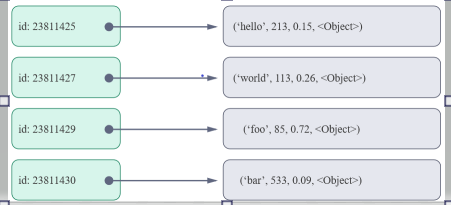
There are multiple implementations of the key-value store that are used in production grade systems worldwide. Some example open source implementations are Redis, CouchDB, Mongo, and Cassandra (which uses a b-tree as the underlying datastructure).

### Binary Tree

In [ ]:
class Node:
    def __init__(self, value = None):
        self.value = value
        self.left = None
        self.right = None
 
    def __repr__(self):
        return "<Node: {}>".format(self.value)

In [12]:
node = Node(2)
print(node.value)
print(node.left)

2
None


In [40]:
class BinaryTree:
    def __init__(self, values = None):
        self.root = None
        if values:
            self.insert(values)
    
    def insert(self, values, index=0):
        node = None
        if index < len(values):
            node = Node(value = values[index])
            if not self.root:
                self.root = node
            node.left = self.insert(values, index = index*2+1)
            node.right = self.insert(values, index = index*2+2)
        return node
    
    def __len__(self):
        return len(self.values)
           
    def is_parent(self, node):
        return bool(node.left or node.right)
    
    def is_interior(self, node):
        return (not node == self.root) and self.is_parent(node)
    
    def is_leaf(self, node):
        return (not node == self.root) and not self.is_interior(node)

    def preorder_traverse(self, node):
        if not node:
            return []
        return (
            [node.value] +
            self.preorder_traverse(node.left) +
            self.preorder_traverse(node.right)
        )
     
    def inorder_traverse(self, node):
        if not node:
            return []
        return (
            self.inorder_traverse(node.left) +
            [node.value] +
            self.inorder_traverse(node.right)
        )
    
    def postorder_traverse(self, node):
        if not node:
            return []
        return (
            self.postorder_traverse(node.left) +
            self.postorder_traverse(node.right) +
            [node.value]
        )
    
    def depth(self, node):
        if not node:
            return 0
        return max(self.depth(node.left), self.depth(node.right)) + 1
    
    def num_nodes(self, node):
        return len(self.preorder_traverse(node))
    
    def is_balanced(self, node):
        if not node:
            return True
        left_height = self.depth(node.left)
        right_height = self.depth(node.right)
        if abs(left_height-right_height) <= 1:
            return True
        else:
            return False

In [41]:
tree = BinaryTree()
tree.insert([4,3,2])
root = tree.root.value
left = tree.root.left.value
right = tree.root.right.value
print(root, left, right)

4 3 2


In [42]:
level_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
tree = BinaryTree(level_order)
root = tree.root.value
child = tree.root.left.right.left.value
print(root, child)

1 10


In [43]:
tree = BinaryTree(level_order)
root_parent = tree.is_parent(tree.root)
parent = tree.is_parent(tree.root.left)
interior = tree.is_interior(tree.root.left)
root_leaf = tree.is_leaf(tree.root)
leaf = tree.is_leaf(tree.root.left.left)
print(root_leaf, leaf)

False False


In [44]:
tree = BinaryTree(level_order)
preorder = tree.preorder_traverse(tree.root)
inorder = tree.inorder_traverse(tree.root)
postorder = tree.postorder_traverse(tree.root)

print('preorder:  ', preorder)
print('inorder:   ', inorder)
print('postorder: ', postorder)

preorder:   [1, 2, 4, 8, 9, 5, 10, 3, 6, 7]
inorder:    [8, 4, 9, 2, 10, 5, 1, 6, 3, 7]
postorder:  [8, 9, 4, 10, 5, 2, 6, 7, 3, 1]


In [45]:
tree = BinaryTree(level_order)
depth = tree.depth(tree.root)
num_nodes = tree.num_nodes(tree.root)
print(depth, num_nodes)
balanced = tree.is_balanced(tree.root)
print(balanced)

4 10
True


In [1]:
# From Corey Shafer
class Node(object):
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class Queue(object): # first-in, first-out
    def __init__(self):
        self.items = []
        
    def enqueue(self, item):
        self.items.insert(0, item) # inserting new to the front to ensure pop out the first-in-first-out by pop.
        
    def dequeue(self):
        if not self.is_empty():
            return self.items.pop()
        
    def is_empty(self):
        return len(self.items) == 0
    
    def peek(self):
        if not self.is_empty():
            return self.items[-1].value
        
    def __len__(self):
        return len(self.items)
        
class BinaryTree(object): 
    def __init__(self, root):
        self.root = Node(root)
    
    def print_tree(self, traversal_type):
        if traversal_type == 'preorder':
            return self.preorder_print(tree.root, '')
        elif traversal_type == 'inorder':
            return self.inorder_print(tree.root, '')
        elif traversal_type == 'postorder':
            return self.postorder_print(tree.root, '')
        elif traversal_type == 'levelorder':
            return self.levelorder_print(tree.root)
        else:
            print(f'traversal type {traversal_type} is not supported')
            return False
    
    def preorder_print(self, start, traversal):
        """ root -> left -> right"""
        if start: # if node not empty
            traversal += (str(start.value) + '-')
            traversal = self.preorder_print(start.left, traversal)
            traversal = self.preorder_print(start.right, traversal)
        return traversal

    # In-order traversal
    def inorder_print(self, start, traversal):
        """ left -> root -> right"""
        if start: 
            traversal = self.inorder_print(start.left, traversal)
            traversal += (str(start.value) + '-')
            traversal = self.inorder_print(start.right, traversal)
        return traversal
   
    # Post-order traversal
    def postorder_print(self, start, traversal):
        """ left -> right -> root """
        if start: 
            traversal = self.postorder_print(start.left, traversal)
            traversal = self.postorder_print(start.right, traversal)
            traversal += (str(start.value) + '-')
        return traversal
    
    # Level-order traversal
    def levelorder_print(self, start):
        if start is None:
            return
        
        queue = Queue()
        queue.enqueue(start)
        traversal = ''
        while len(queue) > 0:
            traversal += (str(queue.peek()) + '-')
            node = queue.dequeue()
            if node.left:
                queue.enqueue(node.left)
            if node.right:
                queue.enqueue(node.right)
        return traversal
    
    def insert(self, data):
        if self.root is None:
            self.root = Node(data)
        else:
            self._insert(data, self.root)

    def _insert(self, data, cur_node):
        if data < cur_node.data:
            if cur_node.left is None:
                cur_node.left = Node(data)
            else:
                self._insert(data, cur_node.left)
        elif data > cur_node.data:
            if cur_node.right is None:
                    cur_node.right = Node(data)
            else:
                self._insert(data, cur_node.right)
        else:
            print('the value is already in tree.')
    
    def find(self, data):
        if self.root:
            is_found = self._find(data, self.root)
            if is_found:
                return True
            return False
        else:
            return None
        
    def _find(self, data, cur_node):
        if data > cur_node.data and cur_node.right:
            return self._find(data, cur_node.right)
        elif data < cur_node.data and cur_node.left:
            return self._find(data, cur_node.left)
        if data == cur_node.data:
            return True
        
    # height of binary tree: longest path to leaf
    def height(self, node):
        if node is None:
            return -1
        left_height = self.height(node.left)
        right_height = self.height(node.right)
        return 1+ max(left_height, right_height)

In [2]:
tree = BinaryTree(1)
tree.root.left = Node(2)
tree.root.right = Node(3)
tree.root.left.left = Node(4)
tree.root.left.right = Node(5)
tree.root.right.left = Node(6)
tree.root.right.right = Node(7)

#            1
#         /     \
#        2       3
#       / \     / \
#      4   5   6   7

print('preorder:  ', tree.print_tree('preorder'))
print('inorder:   ', tree.print_tree('inorder'))
print('postorder: ', tree.print_tree('postorder'))
print('levelorder:', tree.print_tree('levelorder'))

preorder:   1-2-4-5-3-6-7-
inorder:    4-2-5-1-6-3-7-
postorder:  4-5-2-6-7-3-1-
levelorder: 1-2-3-4-5-6-7-


### Binary Heap Tree

In [98]:
# Min Heap: each parent node is less than or equal to its child node. 
# Max heap: each parent node is greater than or equal to its child node.
# To insert a node into a Max heap: add child, compare parent and current node, swap if necessary

class Node:
    def __init__(self, value = None):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

    def __repr__(self):
        # Helpful method to keep track of Node values.
        return "<Node: {}>".format(self.value)    

class MaxHeap:
    def __init__(self):
        self.root = None
    
    def insert(self, value):
        node = Node(value = value)
        if not self.root:
            self.root = node
            return node
        
        if self.root.value >= node.value:  
            node.parent = self.root 
            if not self.root.left:
                self.root.left = node 
            elif not self.root.right:
                self.root.right = node
            return node
        
        old_root = self.root 
        node.left = old_root.left
        node.right = old_root.right
        self.root = node
        
        if not self.root.left:
            self.root.left = old_root
        elif not self.root.right:
            self.root.right = old_root
        return node
                
heap = MaxHeap()
heap.insert(3)
heap.insert(9)
heap.insert(11)
root = heap.root.value
left = heap.root.left.value
right = heap.root.right.value 
print(root, left, right)

11 3 9


In [51]:
# use list as the internal data structure for a max-heap.
import math
class MaxHeap():
    def __init__(self):
        self.nodes = []
    
    def insert(self, value):
        self.nodes.append(value)
        index = len(self.nodes) - 1
        parent_index = math.floor((index-1)/2)
        
        while index > 0 and self.nodes[parent_index] < self.nodes[index]:
            self.nodes[parent_index], self.nodes[index] = self.nodes[index], self.nodes[parent_index]
            index = parent_index
            parent_index = math.floor((index-1)/2)
        return self.nodes
    
    def insert_multiple(self, values):
        for value in values:
            self.insert(value)

    def max(self):
        return self.nodes[0]

    def pop(self): # remove the root element from the max-heap
        root = self.nodes[0]
        self.nodes[0] = self.nodes[-1]
        self.nodes = self.nodes[:-1]
        index = 0
        left_child_idx = 2*index + 1
        right_child_idx = 2*index + 2
        
        while max(left_child_idx, right_child_idx) < len(self.nodes) - 1:
            swap_index = left_child_idx
            if self.nodes[left_child_idx] < self.nodes[right_child_idx]:
                swap_index = right_child_idx
            if self.nodes[swap_index] < self.nodes[index]:
                return root
            
            self.nodes[swap_index], self.nodes[index] = self.nodes[index], self.nodes[swap_index]
            index = swap_index
            left_child_idx = 2*index + 1
            right_child_idx = 2*index + 2
        return root

    def top_n_elements(self, n):
        return [self.pop() for _ in range(n)]

In [52]:
heap = MaxHeap()
heap.insert(3)
heap.insert(9)
heap.insert(11)
nodes = heap.nodes
print(nodes)

[11, 3, 9]


In [53]:
heap_list = [3,9,5,11,4,6]
heap = MaxHeap()
heap.insert_multiple(heap_list)
heap_max = heap.max()
print('heap max after insertion: ', heap_max)
heap_max = heap.pop()
print('first pop: ', heap_max)
heap_max = heap.pop()
print('2nd pop: ', heap_max)
top_3 = heap.top_n_elements(3)
print(f'top_3 is {top_3}')

heap max after insertion:  11
first pop:  11
2nd pop:  9
top_3 is [6, 3, 4]


In [129]:
# using heapq
import csv
import heapq
with open('Raw_data/amounts.csv', 'r') as f:
    reader = csv.reader(f)
    heap_list = list(reader)[1:]
    
# find the top 100 rows with the second column as the key    
top_100 = heapq.nlargest(100, heap_list, key=lambda x: x[1])
print(top_100[:3])

[['141100', '999.9'], ['32406', '999.88'], ['82298', '999.52']]


In [131]:
import time
import random
heap_list = list(range(10 * 100 * 5000))
random.shuffle(heap_list)
    
start = time.time()
sorted(heap_list, reverse=True)[:100]
print("Sorting search took: {} seconds".format(time.time() - start))

start = time.time()
heapq.nlargest(100, heap_list)
print("Heap search took: {} seconds".format(time.time() - start))

Sorting search took: 5.08812952041626 seconds
Heap search took: 1.0156407356262207 seconds


### Binary search tree: left children less than the parent, vise versa

In [47]:
# From Corey Shafer
class Node:
    def __init__(self, data = None):
        self.data = data
        self.left = None
        self.right = None

class BST:
    def __init__(self):
        self.root = None
    
    def insert(self, data):
        if self.root is None:
            self.root = Node(data)
        else:
            self._insert(data, self.root)

    def _insert(self, data, cur_node):
        if data < cur_node.data:
            if cur_node.left is None:
                cur_node.left = Node(data)
            else:
                self._insert(data, cur_node.left)
        elif data > cur_node.data:
            if cur_node.right is None:
                    cur_node.right = Node(data)
            else:
                self._insert(data, cur_node.right)
        else:
            print('the value is already in tree.')
    
    def find(self, data):
        if self.root:
            is_found = self._find(data, self.root)
            if is_found:
                return True
            return False
        else:
            return None
        
    def _find(self, data, cur_node):
        if data > cur_node.data and cur_node.right:
            return self._find(data, cur_node.right)
        elif data < cur_node.data and cur_node.left:
            return self._find(data, cur_node.left)
        if data == cur_node.data:
            return True
        
    # height of binary tree: longest path to leaf
    def height(self, node):
        if node is None:
            return -1
        left_height = self.height(node.left)
        right_height = self.height(node.right)
        return 1+ max(left_height, right_height)

In [48]:
bst = BST()
bst.insert(4)
bst.insert(2)
bst.insert(8)
bst.insert(5)
bst.insert(10)

print(bst.find(7))
print(bst.height(bst.root))   

False
2


In [33]:
"""
BST = Every value in a nodes' left sub-tree has a value that is less than or equal to the parent node
      Every value in a nodes' right sub-tree has a value that is greater than or equal to the parent node
"""
class Node:
    def __init__(self, value=None):
        self.left = None
        self.right = None
        self.value = value
    
    def __str__(self):
        return "<Node: {}>".format(self.value)

class BaseBST:
    def __init__(self):
        self.node = None
    
    def insert(self, value=None):
        node = Node(value=value)
        if not self.node:
            self.node = node
            self.node.right = BaseBST()
            self.node.left = BaseBST()
            return
        
        if value > self.node.value:
            if self.node.right:
                self.node.right.insert(value=value)
            else:
                self.node.right.node = node
            return
        
        if self.node.left:
            self.node.left.insert(value=value)
        else:
            self.node.left.node = node
    
    def inorder(self, tree):
        if not tree or not tree.node:
            return []
        return (
            self.inorder(tree.node.left) +
            [tree.node.value] +
            self.inorder(tree.node.right)
        )

    def search(self, value):
        if not self.node:
            return False
        if value == self.node.value:
            return True
        result = False
        if self.node.left:
            result = self.node.left.search(value)
        if self.node.right:
            result = self.node.right.search(value)
        return result
    
bst = BaseBST()
bst.insert(4)
bst.insert(2)
bst.insert(1)
bst.insert(5)
bst.insert(3)
root = bst.node.value
print(root)

4


In [38]:
class BST(BaseBST):
    def insert_multiple(self, values):
        for value in values:
            self.insert(value)
    
    def depth(self, node):
        if not node:
            return 0
        if not node.left and not node.right:
            return 1
        return max(self.depth(node.left.node), self.depth(node.right.node)) + 1
    
    def is_balanced(self):
        if not self.node:
            return True
        left_subtree = self.depth(self.node.left.node)
        right_subtree = self.depth(self.node.right.node)
        return abs(left_subtree - right_subtree) < 2

    def left_rotate(self):
        old_node = self.node                # save old self.node
        new_node = self.node.right.node     # set new root note as old.node.right.node
        if not new_node:                    # stop is new node is not a node
            return
        new_right_sub = new_node.left.node  # prepare to move new_node.left.node to the left of new node
        self.node = new_node                # replace root node with new_node
        old_node.right.node = new_right_sub # move new_node.left.node as right node for the old root note
        new_node.left.node = old_node
    
    def right_rotate(self):
        old_node = self.node
        new_node = self.node.left.node
        if not new_node:
            return
        
        new_left_sub = new_node.right.node
        self.node = new_node
        old_node.left.node = new_left_sub
        new_node.right.node = old_node

bst_values = range(20)
bst = BST()
bst.insert_multiple(bst_values)
sorted_inorder = bst.inorder(bst)
print(sorted_inorder)
does_exist_1 = bst.search(1)
print('does_exist_1?', does_exist_1)
does_exist_27 = bst.search(27)
print('does_exist_27?', does_exist_27)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
does_exist_1? True
does_exist_27? False


In [39]:
# check for tree-balance BST
bst_values = [3,2,5,4,7]
bst = BST()
bst.insert_multiple(bst_values)
balanced = bst.is_balanced()
print(balanced)

True


In [40]:
# self-balancing tree using rotations
bst = BST()
bst.insert_multiple(bst_values)
bst.left_rotate()
left_balanced = bst.is_balanced()
bst.right_rotate()
right_balanced = bst.is_balanced()
print(left_balanced, right_balanced)

True True


In [41]:
# AVL (Adelson-Velsky and Landis) Tree: self_balancing
class BST(BaseBST):
    def insert(self, value=None):
        node = Node(value=value)
        if not self.node:
            self.node = node
            self.node.left = BST()
            self.node.right = BST()
            return
        
        if value > self.node.value:
            if self.node.right:
                self.node.right.insert(value=value)
            else:
                self.node.right.node = node
        else:
            if self.node.left:
                self.node.left.insert(value=value)
            else:
                self.node.left.node = node
        
        difference = self.depth(self.node.left.node) - self.depth(self.node.right.node)
        
        # Left side case.
        if difference > 1:
            # Left-right case.
            if value > self.node.right.node.value:
                self.node.left.left_rotate()
            # Left-left case.
            self.right_rotate()
            
        # Right side case.
        if difference < -1:
            # Right-left case.
            if value <= self.node.left.node.value:
                self.node.left.right_rotate()
            self.left_rotate()
    
    def insert_multiple(self, values):
        for value in values:
            self.insert(value)
            
    def depth(self, node):
        if not node:
            return 0
        if not node.left and not node.right:
            return 1
        
        return max(self.depth(node.left.node), self.depth(node.right.node)) + 1
    
    def is_balanced(self):
        if not self.node:
            return True
        
        left_subtree = self.depth(self.node.left.node)
        right_subtree = self.depth(self.node.right.node)
        
        return abs(left_subtree - right_subtree) < 2

bst = BST()
bst.insert_multiple(bst_values)
inorder = bst.inorder(bst)
is_bst_balanced = bst.is_balanced()
print(is_bst_balanced)

True


In [52]:
class Node:
    def __init__(self, key=None, value=None):
        self.left = None
        self.right = None
        self.key = key
        self.value = value

    def __str__(self):
        return "<Node: {}>".format(self.value)
    
class BST(BaseBST):
    def __init__(self, index=None):
        self.node = None
        self.index = index
    
    def insert_multiple(self, values):
        for value in values:
            self.insert(value)
    
    def depth(self, node):
        if not node:
            return 0
        if not node.left and not node.right:
            return 1
        
        return max(self.depth(node.left.node), self.depth(node.right.node)) + 1
    
    def insert(self, value=None):  # value = list
        key = value
        if self.index:
            key = value[self.index]
        node = Node(key=key, value=value)
        
        if not self.node:
            self.node = node
            self.node.left = BST(index=self.index)
            self.node.right = BST(index=self.index)
            return
        
        if key > self.node.key:
            if self.node.right:
                self.node.right.insert(value=value)
            else:
                self.node.right.node = node
        else:
            if self.node.left:
                self.node.left.insert(value=value)
            else:
                self.node.left.node = node
        
        difference = self.depth(self.node.left.node) - self.depth(self.node.right.node)
        
        # Left side case.
        if difference > 1:
            # Left-right case.
            if key > self.node.right.node.key:
                self.node.left.left_rotate()
            # Left-left case.
            self.right_rotate()
            
        # Right side case.
        if difference < -1:
            # Right-left case.
            if key <= self.node.left.node.key:
                self.node.left.right_rotate()
            self.left_rotate()
    
    def search(self, key):
        if not self.node:
            return False
        if key == self.node.key:
            return True
        
        result = False
        if self.node.left:
            result = self.node.left.search(key)
        if self.node.right:
            result = self.node.right.search(key)
        return result
    
    def left_rotate(self):
        old_node = self.node
        new_node = self.node.right.node
        if not new_node:
            return
        
        new_right_sub = new_node.left.node
        self.node = new_node
        old_node.right.node = new_right_sub
        new_node.left.node = old_node
    
    def right_rotate(self):
        old_node = self.node
        new_node = self.node.left.node
        if not new_node:
            return
     
bst_values = [3,2,5,4,7]
bst = BST()
bst.insert_multiple(bst_values)
inorder = bst.inorder(bst)
bst_list = BST(index=2)
bst_list_values = [['hello', 'world', 3],['goodbye', 'world', 2],['foo', 'bar', 5],['fizz', 'buzz', 4],['lorem', 'ipsum', 7],['this', 'that', 6],
['enough', 'programming', 8]]
bst_list.insert_multiple(bst_list_values)
inorder_list = bst.inorder(bst_list)
print(inorder_list)

[['goodbye', 'world', 2], ['hello', 'world', 3], ['fizz', 'buzz', 4], ['foo', 'bar', 5], ['this', 'that', 6], ['lorem', 'ipsum', 7], ['enough', 'programming', 8]]


In [43]:
print(help(bst.insert))
print(isinstance(bst, BST))
print(issubclass(BST,BaseBST))

Help on method insert in module __main__:

insert(value=None) method of __main__.BST instance

None
True
True


### B-trees and B+ trees

In [107]:
# store and search list of lists
class Node:
    def __init__(self, key=None, value=None):
        self.left = None
        self.right = None
        self.key = key
        self.value = value

    def __str__(self):
        return "<Node: {}>".format(self.value)
    
class BST(BaseBST):
    def __init__(self, index=None):
        self.node = None
        self.index = index
    
    def insert_multiple(self, values):
        for value in values:
            print('from insert_multiple:', value)
            self.insert(value)
    
    def depth(self, node):
        if not node:
            return 0
        if not node.left and not node.right:
            return 1
        return max(self.depth(node.left.node), self.depth(node.right.node)) + 1
    
    def insert(self, value=None):  # value = list
        key = value
        if self.index:
            key = value[self.index]
        node = Node(key=key, value=value)
        
        if not self.node:
            self.node = node
            self.node.left = BST(index=self.index)
            self.node.right = BST(index=self.index)
            return
        
        if key > self.node.key:
            if self.node.right:
                self.node.right.insert(value=value)
            else:
                self.node.right.node = node
        else:
            if self.node.left:
                self.node.left.insert(value=value)
            else:
                self.node.left.node = node
        
        difference = self.depth(self.node.left.node) - self.depth(self.node.right.node)
        
        # Left side case.
        if difference > 1:
            # Left-right case.
            if key > self.node.right.node.key:
                self.node.left.left_rotate()
            # Left-left case.
            self.right_rotate()
            
        # Right side case.
        if difference < -1:
            # Right-left case.
            if key <= self.node.left.node.key:
                self.node.left.right_rotate()
            self.left_rotate()
    
    def search(self, key):
        if not self.node:
            return False
        if key == self.node.key:
            return True
        
        result = False
        if self.node.left:
            result = self.node.left.search(key)
        if self.node.right:
            result = self.node.right.search(key)
        return result
    
    def left_rotate(self):
        old_node = self.node
        new_node = self.node.right.node
        if not new_node:
            return
        
        new_right_sub = new_node.left.node
        self.node = new_node
        old_node.right.node = new_right_sub
        new_node.left.node = old_node
    
    def right_rotate(self):
        old_node = self.node
        new_node = self.node.left.node
        if not new_node:
            return
     
    def greater_than(self, key):
        """returns a list of the values greater than the given key"""
        if not self.node:
            return []
        
        values = []
        if self.node.left:
            values += self.node.left.greater_than(key)
        if self.node.right:
            values += self.node.right.greater_than(key)
        if self.node.key > key:
            values.append(self.node.value)
        return values

bst = BST()
bst.insert_multiple(bst_values)
greater = bst.greater_than(5)

bst_list = BST(index=2)
bst_list.insert_multiple(bst_list_values)
greater_list = bst_list.greater_than(5)
print()
print(greater_list)

from insert_multiple: 3
from insert_multiple: 2
from insert_multiple: 5
from insert_multiple: 4
from insert_multiple: 7
from insert_multiple: ['hello', 'world', 3]
from insert_multiple: ['goodbye', 'world', 2]
from insert_multiple: ['foo', 'bar', 5]
from insert_multiple: ['fizz', 'buzz', 4]
from insert_multiple: ['lorem', 'ipsum', 7]
from insert_multiple: ['this', 'that', 6]
from insert_multiple: ['enough', 'programming', 8]

[['this', 'that', 6], ['enough', 'programming', 8], ['lorem', 'ipsum', 7]]


In [78]:
with open('Raw_data\\amounts.csv', 'r') as f:
    data = f.readlines()
print(data[0:10])

['"Time","Amount"\n', '0,149.62\n', '0,2.69\n', '1,378.66\n', '1,123.5\n', '2,69.99\n', '2,3.67\n', '4,4.99\n', '7,40.8\n', '7,93.2\n']


In [2]:
import csv
with open('Raw_data\\amounts.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    amount_rows = list((int(float(r[0])), float(r[1])) for r in reader)
print(amount_rows[0:15])

[(0, 149.62), (0, 2.69), (1, 378.66), (1, 123.5), (2, 69.99), (2, 3.67), (4, 4.99), (7, 40.8), (7, 93.2), (9, 3.68), (10, 7.8), (10, 9.99), (10, 121.5), (11, 27.5), (12, 58.8)]


In [1]:
import time
start = time.time()
import csv
with open('amounts.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    # query on the second column, the amounts field to find rows
    amount_rows = list((int(float(r[0])), float(r[1])) for r in reader)
    # amount_rows = amount_rows[0:1000]

durations_insert=[]
durations_search=[]

bst = BST(index=1)
for i in range(1000, 5000, 500):
    data = amount_rows[0:i]
    bst.insert_multiple(data)
    ins_time = time.time()
    durations_insert.append(ins_time - start)
# print(f'time to complete insert = {time.time() - start}'.format(time.time() - start), 2)
    csv_query = bst.greater_than(10)
    durations_search.append(time.time() - ins_time)
    print(csv_query[0:5])

[(553, 10.08), (373, 10.29), (206, 10.27), (449, 10.2), (735, 10.38)]
[(553, 10.08), (449, 10.2), (553, 10.08), (206, 10.27), (373, 10.29)]
[(553, 10.08), (553, 10.08), (1323, 10.09), (449, 10.2), (449, 10.2)]
[(553, 10.08), (553, 10.08), (553, 10.08), (1323, 10.09), (1872, 10.12)]
[(553, 10.08), (553, 10.08), (553, 10.08), (553, 10.08), (1323, 10.09)]
[(2736, 10.02), (553, 10.08), (553, 10.08), (553, 10.08), (553, 10.08)]
[(2736, 10.02), (553, 10.08), (553, 10.08), (553, 10.08), (2736, 10.02)]
[(2736, 10.02), (2736, 10.02), (553, 10.08), (553, 10.08), (553, 10.08)]


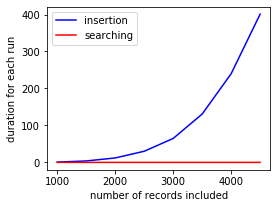

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(4,3))
plt.plot(range(1000, 5000, 500), durations_insert, color='blue')
plt.plot(range(1000, 5000, 500), durations_search, color='red')
plt.xlabel('number of records included')
plt.ylabel('duration for each run')
plt.legend(['insertion', 'searching'])

### Performance Boosts of Using a B-Tree

Constraints for a B-tree of order m:
    1. the root has >= 2 children
    2. every node has <= m children, 
    3. every non-leaf, non-root node has >= m/2 children
    4. a non-leaf node with k children has k-1 keys
    5. all leaves appear at the same level
To insert a key, first loop through root to find the right leaf note, then loop through the leaf note to find the right position.
If the leaf is full, after finding the right child node, split the node to two, insert theh new key, then promote the median key up one level.

In [28]:
import csv
import linecache
import timeit

def find_row():
    return list(csv.reader(linecache.getline('Raw_data\\amounts.csv', 282748)))
print(find_row())
print(timeit.timeit('find_row()', 'from __main__ import find_row', number=100))

[['1'], ['7'], ['1'], ['1'], ['1'], ['6'], ['', ''], ['9'], ['.'], ['8'], ['5'], []]
0.0005023999999593798


In [43]:
def brute_search():
    with open('Raw_data\\amounts.csv') as f:
        reader = csv.reader(f)
        rows = []
        for row in reader:
            if reader.line_num in [4, 41231, 284400]:
                rows.append(row)
        return rows

def cache_search():
    """linecache module exposes a function getline() which takes in a file, a line number, 
       then retrieves that line from the file"""
    return list(csv.reader(linecache.getline('Raw_data\\amounts.csv', i) for i in [4, 41231, 284400]))

print(timeit.timeit('brute_search()', 'from __main__ import brute_search', number=50))
print(timeit.timeit('cache_search()', 'from __main__ import cache_search', number=50))
print(brute_search())
print(cache_search())

13.787184600001638
0.06272309999985737
[['1', '378.66'], ['40596', '23.88'], ['172406', '41.97']]
[['1', '378.66'], ['40596', '23.88'], ['172406', '41.97']]


In [54]:
class Node:
    """An index is a data structure that contains a key and a direct reference to a row of data.
       The index could stores a key like a timestamp and a value like file's line number """
    def __init__(self, keys=None, children=None):
        # nodes of the tree contains number of keys and reference
        self.keys = keys or []
        self.children = children or []
    
    def is_leaf(self):
        return len(self.children) == 0

    def __repr__(self):
        return "<Node: {}>".format(self.keys)    

In [3]:
class BTree:
    def __init__(self, t): # init tree with degree and root
        self.t = t
        self.root = None

    def insert_multiple(self, keys):
        for key in keys:
            self.insert(key)
        
    def insert(self, key):
        if not self.root:
            self.root = Node(keys=[key])
            return
        
        if len(self.root.keys) == 2*self.t - 1:
            old_root = self.root
            self.root = Node()
            left, right, new_key = self.split(old_root)
            self.root.keys.append(new_key)
            self.root.children.append(left)
            self.root.children.append(right)
            
        self.insert_non_full(self.root, key)  
        
    def insert_non_full(self, node, key):  # add a new key in sorted order into a leaf node
        if node.is_leaf(): # if node has no children
            index = 0
            for k in node.keys:
                if key > k: index += 1  # if new key > older keys, keep moving
                else: break # if leaf node is full, break
            node.keys.insert(index, key)  # inserting new key at new index
            return
        
        index = 0  # if node has children, also loop through keys to find new index for the new key
        for k in node.keys:
            if key > k: index += 1 # find right index for a child
            else: break
                
        if len(node.children[index].keys) == 2*self.t - 1:  # if child is full, spliting it next
            left_node, right_node, new_key = self.split(node.children[index])
            node.keys.insert(index, new_key)
            node.children[index] = left_node
            node.children.insert(index+1, right_node)
            if key > new_key:
                index += 1
        self.insert_non_full(node.children[index], key)
    
    def split(self, node):
        left_node = Node(
            keys=node.keys[:len(node.keys)//2],
            children=node.children[:len(node.children)//2+1]
        )
        right_node = Node(
            keys=node.keys[len(node.keys)//2:],
            children=node.children[len(node.children)//2:]
        )
        key = right_node.keys.pop(0)
        return left_node, right_node, key
     
    def search(self, node, term):
        if not self.root:
            return False
        index = 0
        for key in node.keys:
            if key == term:
                return True
            if term > key:
                index += 1
        if node.is_leaf():
            return False
        
        return self.search(node.children[index], term)
       
btree = BTree(4)
b_node = Node(keys=[8, 18])
b_node.children.append(Node(keys=[-3, -2, -1, 2, 3, 5, 7]))
b_node.children.append(Node(keys=[9, 10, 11, 12, 14, 18, ]))
b_node.children.append(Node(keys=[17, 20, 44]))
btree.root = b_node
btree.insert(1)
btree.insert(4)
btree.insert(6)
btree.insert(13)
btree.insert(17)
btree.insert(22)
child_keys = btree.root.children[1].keys
print(child_keys)

[3, 4, 5, 6, 7]


In [4]:
btree = BTree(5)
btree.insert_multiple(range(0, 100))
child_keys = btree.root.children[-1].children[0].keys
print(child_keys)

[50, 51, 52, 53]


In [5]:
btree = BTree(4)
btree.insert_multiple(range(0,100))
search_6 = btree.search(btree.root, 6)
search_73 = btree.search(btree.root, 73)
search_101 = btree.search(btree.root, 101)
print(search_6, search_73, search_101)

True True False


In [6]:
import csv
with open('amounts.csv', 'r') as f:
    reader = csv.reader(f)
    values = [float(l[0]) for l in list(reader)[1:]] # get values from the time column
      
btree = BTree(5)
btree.insert_multiple(values)
search = btree.search(btree.root,17106)
root = btree.root.keys
print(root)

[57618.0, 109829.0]


In [8]:
class NodeKey:
    def __init__(self, key, value):
        self.key = key
        self.value =value
    
    def __eq__(self, other):
        if isinstance(other, self.__class__):
            return self.key == other.key
        return self.key == other

    def __gt__(self, other):
        if isinstance(other, self.__class__):
            return self.key > other.key
        return self.key > other
    
    def __lt__(self, other):
        if isinstance(other, self.__class__):
            return self.key < other.key
        return self.key < other
    
    def __ge__(self, other):
        if isinstance(other, self.__class__):
            return self.key >= other.key
        return self.key > other
    
    def __le__(self, other):
        if isinstance(other, self.__class__):
            return self.key <= other.key
        return self.key < other
    
    def __repr__(self):
        return "<Node: {}:{}>".format(self.key, self.value)
    
with open('amounts.csv', 'r') as f:
    reader = csv.reader(f)
    nodekeys = [NodeKey(float(row[0]),float(row[0])) for row in list(reader)[1:]]

btree = BTree(5)
btree.insert_multiple(nodekeys)
search = btree.search(btree.root, 171116)
root_key = btree.root.keys[0].key
print(root_key)

57618.0


In [9]:
print(nodekeys[0:5])

[<Node: 0.0:0.0>, <Node: 0.0:0.0>, <Node: 1.0:1.0>, <Node: 1.0:1.0>, <Node: 2.0:2.0>]


In [10]:
with open('amounts.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    nodekeys = [NodeKey(float(row[0]), reader.line_num) for row in reader]

btree = BTree(5)
btree.insert_multiple(nodekeys)
root_value = btree.root.keys[1].value
print(root_key)

57618.0


In [11]:
print(nodekeys[0:5])

[<Node: 0.0:2>, <Node: 0.0:3>, <Node: 1.0:4>, <Node: 1.0:5>, <Node: 2.0:6>]


In [21]:
class BTreeIndex:
    def __init__(self, t): # init tree with degree and root
        self.t = t
        self.root = None

    def insert_multiple(self, keys):
        for key in keys:
            self.insert(key)
        
    def insert(self, key):
        if not self.root:
            self.root = Node(keys=[key])
            return
        
        if len(self.root.keys) == 2*self.t - 1:
            old_root = self.root
            self.root = Node()
            left, right, new_key = self.split(old_root)
            self.root.keys.append(new_key)
            self.root.children.append(left)
            self.root.children.append(right)
            
        self.insert_non_full(self.root, key)  
        
    def insert_non_full(self, node, key):  # add a new key in sorted order into a leaf node
        if node.is_leaf(): # if node has no children
            index = 0
            for k in node.keys:
                if key > k: index += 1  # if new key > older keys, keep moving
                else: break # if leaf node is full, break
            node.keys.insert(index, key)  # inserting new key at new index
            return
        
        index = 0  # if node has children, also loop through keys to find new index for the new key
        for k in node.keys:
            if key > k: index += 1 # find right index for a child
            else: break
                
        if len(node.children[index].keys) == 2*self.t - 1:  # if child is full, spliting it next
            left_node, right_node, new_key = self.split(node.children[index])
            node.keys.insert(index, new_key)
            node.children[index] = left_node
            node.children.insert(index+1, right_node)
            if key > new_key:
                index += 1
        self.insert_non_full(node.children[index], key)
    
    def split(self, node):
        left_node = Node(
            keys=node.keys[:len(node.keys)//2],
            children=node.children[:len(node.children)//2+1]
        )
        right_node = Node(
            keys=node.keys[len(node.keys)//2:],
            children=node.children[len(node.children)//2:]
        )
        key = right_node.keys.pop(0)
        return left_node, right_node, key
    
    def search(self, node, term):
        if not self.root:
            return None
        index = 0
        for key in node.keys:
            if key == term:
                return key.value
            if term > key:
                index += 1
        if node.is_leaf():
            return None
        return self.search(node.children[index], term)
    
    def greater_than(self, node, term, upper_bound=None, inclusive=False):
        '''look for values greater than or equal to (if inclusive==True) a given value 
           but less than or equal to (if inclusive== True) the upper_bound.'''
        if not self.root:  # if not root (added during insert), list empty
            return []
        index = 0
        values = []
        for key in node.keys:
            # first check upper bound not being violeted
            if upper_bound is not None:
                if inclusive and key == upper_bound:
                    values.append(key)
                if key >= upper_bound:
                    break
            # if key < term, moving on to the next key
            if term > key:  
                index += 1
                continue
            if inclusive and key == term:
                values.append(key)
            # if key satisfies condition, add it to the final list
            if term < key:
                values.append(key)
            # continue to find values in child    
            if not node.is_leaf():
                values += self.greater_than(
                    node.children[index],
                    term,
                    upper_bound,
                    inclusive
                )
            index += 1
        
        if not node.is_leaf():
            values += self.greater_than(
                node.children[index],
                term,
                upper_bound,
                inclusive
            )
        return values
    
    def less_than(self, node, term, lower_bound=None, inclusive=False):
        if not self.root:
            return []
        index = 0
        values = []
        for key in node.keys:
            if lower_bound is not None:
                if inclusive and key == lower_bound:
                    values.append(key)
                if key < lower_bound:
                    index += 1
                    continue
            if inclusive and key == term:
                values.append(key)
            if key < term:
                values.append(key)
            if not node.is_leaf():
                values += self.less_than(
                    node.children[index],
                    term,
                    lower_bound,
                    inclusive
                )
            index += 1
                
        if not node.is_leaf() and key <= term:
            values += self.less_than(
                node.children[index],
                term,
                lower_bound,
                inclusive
            )
        return values

In [17]:
index = BTreeIndex(5)
index.insert_multiple(nodekeys)
search_1 = index.search(index.root, 171116)
search_2 = index.search(index.root, 100000000)
print(search_1, search_2)

282748 None


In [16]:
index = BTreeIndex(5)
index.insert_multiple(nodekeys)
greater = index.greater_than(index.root, 170361)
other_greater = index.greater_than(index.root, 170361)
upper = index.greater_than(index.root, 170361, upper_bound=171409)
inclusive = index.greater_than(index.root, 170361, upper_bound=171409, inclusive=True)
print(greater[:4])
print(other_greater[:4])
print(upper[:4])
print(inclusive[:4])

[<Node: 170399.0:170399.0>, <Node: 170365.0:170365.0>, <Node: 170364.0:170364.0>, <Node: 170363.0:170363.0>]
[<Node: 170399.0:170399.0>, <Node: 170365.0:170365.0>, <Node: 170364.0:170364.0>, <Node: 170363.0:170363.0>]
[<Node: 170399.0:170399.0>, <Node: 170365.0:170365.0>, <Node: 170364.0:170364.0>, <Node: 170363.0:170363.0>]
[<Node: 170399.0:170399.0>, <Node: 170365.0:170365.0>, <Node: 170361.0:170361.0>, <Node: 170361.0:170361.0>]


In [106]:
index = BTreeIndex(5)
index.insert_multiple(nodekeys)
less_than = index.less_than(index.root,769)
lower = index.less_than(index.root, 769, lower_bound=46)
inclusive = index.less_than(index.root, 769, lower_bound=46, inclusive=True)
print(less_than[:4])
print(lower[:4])
print(inclusive[:4])

[<Node: 472.0:623>, <Node: 78.0:125>, <Node: 22.0:27>, <Node: 2.0:7>]
[<Node: 472.0:623>, <Node: 78.0:125>, <Node: 48.0:75>, <Node: 46.0:73>]
[<Node: 472.0:623>, <Node: 78.0:125>, <Node: 48.0:75>, <Node: 46.0:73>]


In [25]:
import pickle
index = BTreeIndex(4)
index.insert_multiple(nodekeys)
with open('index_example.pickle', 'wb') as f:
    pickle.dump(index, f)
    
with open('index_example.pickle', 'rb') as f:
    index_new = pickle.load(f) 
    
new_key = index_new.root.keys[0].key
print(new_key)

52190.0


In [29]:
import timeit
with open('index_example.pickle', 'rb') as f:
    index = pickle.load(f)

def index_search():
    lines = [
        key.value
        for key in index.greater_than(index.root, 171116, inclusive=True)
    ]
    return list(csv.reader(linecache.getline('Raw_data//amounts.csv', i) for i in lines))

def brute_search():
    with open('Raw_data//amounts.csv') as f:
        reader = csv.reader(f)
        next(reader)
        rows = []
        for row in reader:
            if float(row[0]) >= 171116:
                rows.append(row)
        return rows

print(timeit.timeit('index_search()', 'from __main__ import index_search', number=50))
print(timeit.timeit('brute_search()', 'from __main__ import brute_search', number=50))

0.2994608999999855
9.739965699999857


### Implementing a Key-Value Database

In [ ]:
import pickle
from btree import Node, BTree, NodeKey

class DQKV(BTree):
    def __init__(self, type_, values=None):
        self.type = type_
        # Pass some `type_` and `values` to the
        # parent `__init__` method.
        super().__init__(10)

    def get(self, key):
        value = self.search(self.root, key)
        if value is None:
            raise KeyError('There is no value for key "{}"'.format(key))
        return value
    
    def set(self, key, value):
        if value is None:
            raise ValueError('Cannot store None values')
        if not isinstance(key, self.type):
            raise KeyError('Key must be of type {}'.format(self.type))
        exists = self.search(self.root, key)
        if exists is not None:
            raise ValueError('Cannot store duplicate key values')
            
        node = NodeKey(key, value)
        self.insert(node)
    
    def range_query(self, interval, inclusive=False):
        if not isinstance(interval, (list, tuple)) and len(interval) != 2:
            raise ValueError('The first argument must be a list or tuple of length 2')
        
        lower, upper = interval
        if lower is None:
            return self.less_than(self.root, upper, inclusive=inclusive)
        return self.greater_than(self.root, lower, upper_bound=upper, inclusive=inclusive)
    
    def save(self, filename):
        filename = filename + '.dqdb'
        with open(filename, 'wb') as f:
            pickle.dump(self, f)
            return True
        return False
    
    def load_from_dict(self, dictionary):
        for key, value in dictionary.items():
            self.set(key, value)
    
    @staticmethod   # returns a static method for a function passed as the parameter
    def load(filename):
        filename = filename + '.dqdb'
        with open(filename, 'rb') as f:
            return pickle.load(f)